In [1]:
import importlib
import pickle
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy.spatial import KDTree
from scipy.stats._continuous_distns import norm
from sklearn.metrics.pairwise import euclidean_distances
from statsmodels.distributions.empirical_distribution import ECDF

import exposure_series as es
import mstmeclass as mc
from mstmeclass import MSTME, SIMSET, STM

In [2]:
simset = SIMSET("guadeloupe", "h-east", -100)

# get stm from previous result
path_condition = Path(f"./output/{simset.region}/{simset.rf}/GP{60}%_CM{90}%_100subsamples")
with open(path_condition / "mstme_condition.dill", "rb") as f:
    mstme:MSTME = pickle.load(f)
stm = mstme.stm
num_events = mstme.num_events
num_vars = mstme.num_vars
# exp_series = []
# time_max = 0
# for i in range(num_events):
#     _ds = xr.open_dataset(f"./data/exp_series/{i:03d}.nc")
#     exp_series.append(_ds)
#     time_max = max(time_max, _ds.dims["time"])

tree = KDTree(mstme.latlon)
grid_res = 10
lat_list = np.linspace(simset.min_lat, simset.max_lat, grid_res)
lon_list = np.linspace(simset.min_lon, simset.max_lon, grid_res)
dist_list, pos_list = tree.query([[[lat, lon] for lat in lat_list] for lon in lon_list])
pos_list = pos_list.flatten()
mask = mstme.mask
paths = [Path(f"./data/exp_series/{i:03d}.nc") for i in mask.nonzero()[0]]
ds_exp_series = es.load_data(paths, mask, pos_list)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


41
42
43
44
45
46
47
48
49
50
51


In [3]:
importlib.reload(es)

<module 'exposure_series' from 'J:\\mstme\\src\\exposure_series.py'>

In [20]:
res = 10
di = 0
dist_method = ["md", "hausdorff"]
use_temporal = True
mask_type = 'square'
mask_threshold = 0.2

k_dict = {"k_null": [], "k": [], "d_mat_sorted": []}

for vi in range(num_vars):
    k_arr = []
    k_null_arr = []
    d_mat_sorted_arr = []
    for i, ni in enumerate(pos_list):
        num_events_ext = np.count_nonzero(mstme.is_e[vi])
        exp_series_ext = [
            ds_exp_series[idx].isel(node=i) for idx in np.where(mstme.is_e[vi])[0]
        ]
        stm_ext = mstme.stm[vi, mstme.is_e[vi]]

        k, k_null, d_mat_sorted = es.calculate_stuff2(
            stm_ext,
            exp_series_ext,
            num_events_ext,
            res,
            dist_method[di],
            use_temporal,
            mask_type,
            threshold=mask_threshold,
        )
        print(f"{k*100:.2f}% of SD increases as STM of H increases")
        k_arr.append(k)
        k_null_arr.append(k_null)
        d_mat_sorted_arr.append(d_mat_sorted)
    k_dict["k"].append(k_arr)
    k_dict["k_null"].append(k_null_arr)
    k_dict["d_mat_sorted"].append(d_mat_sorted_arr)

45.95% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
54.05% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
43.24% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
43.24% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
27.03% of SD increases as STM of H increases
37.84% of SD increases as STM of H increases
43.24% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
40.54% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
24.32% of 

In [87]:
importlib.reload(es)

<module 'exposure_series' from 'D:\\mstme\\src\\exposure_series.py'>

In [10]:
k_dict['d_mat_sorted'][1][0].shape

(23, 23)

In [15]:
subdir = f"dm/{dist_method[di]}_temporal_{use_temporal}_mask_{mask_type}_avg"
if mask_type=='square': subdir+=f"_thr_{mask_threshold:.2f}"
path_out = path_condition/ subdir
if not path_out.exists():
    path_out.mkdir(parents=True, exist_ok=True)
grapher = es.Grapher(
    path_out, mstme, k_dict, simset.region, dist_method[di], pos_list, num_vars, mstme.latlon
)


48.65% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
59.09% of SD increases as STM of H increases
54.05% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
31.82% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
59.09% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
45.45% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
50.00% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
40.91% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
54.05% of SD increases as STM of H increases
59.09% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
43.24% of 

J:\mstme\src\exposure_series.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(


48.65% of SD increases as STM of H increases
50.00% of SD increases as STM of H increases
54.05% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
40.91% of SD increases as STM of H increases
40.54% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
59.09% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
54.55% of SD increases as STM of H increases
40.54% of SD increases as STM of H increases
50.00% of SD increases as STM of H increases
48.65% of SD increases as STM of H increases
59.09% of SD increases as STM of H increases
45.95% of SD increases as STM of H increases
40.91% of SD increases as STM of H increases
54.05% of SD increases as STM of H increases
63.64% of SD increases as STM of H increases
51.35% of SD increases as STM of H increases
50.00% of SD increases as STM of H increases
51.35% of 

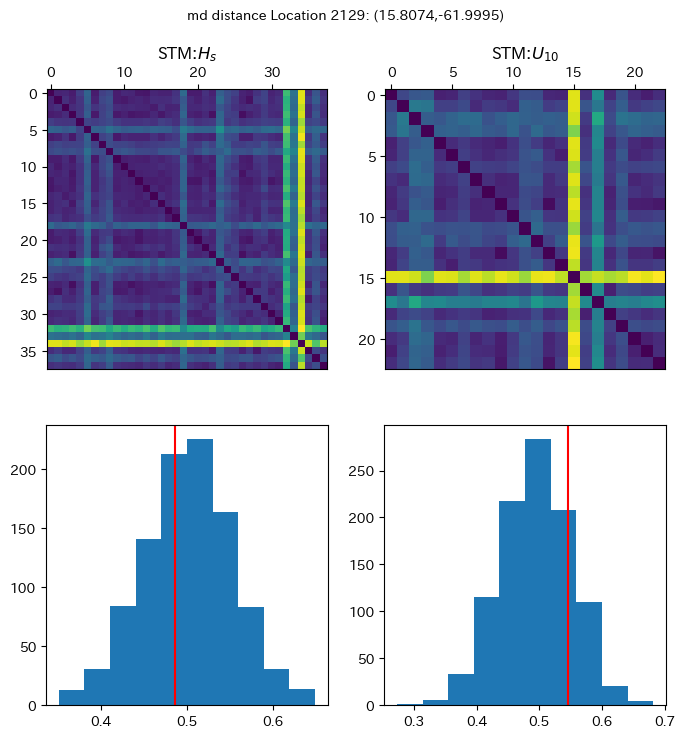

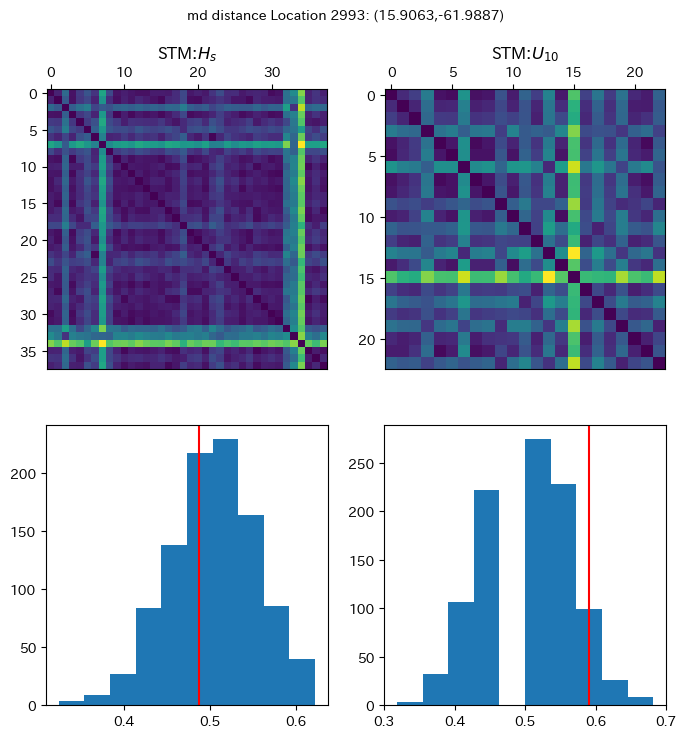

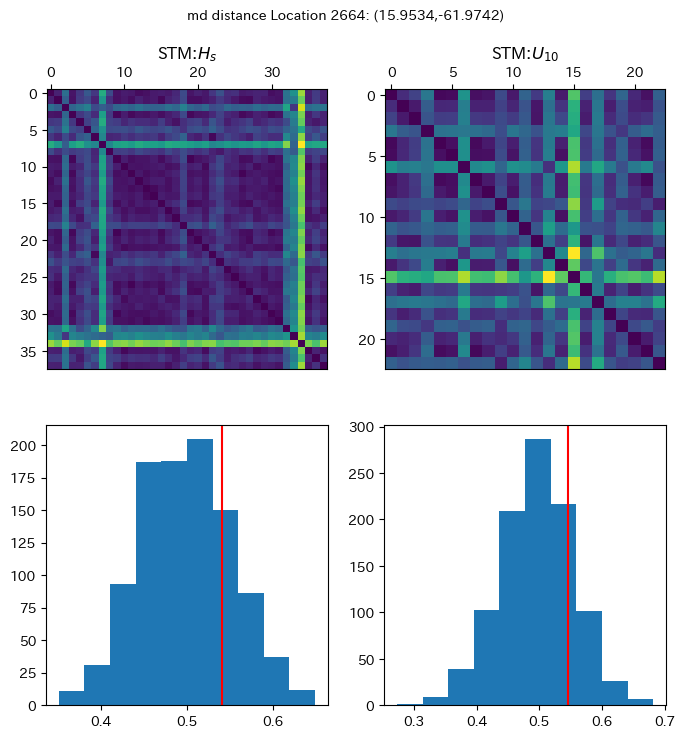

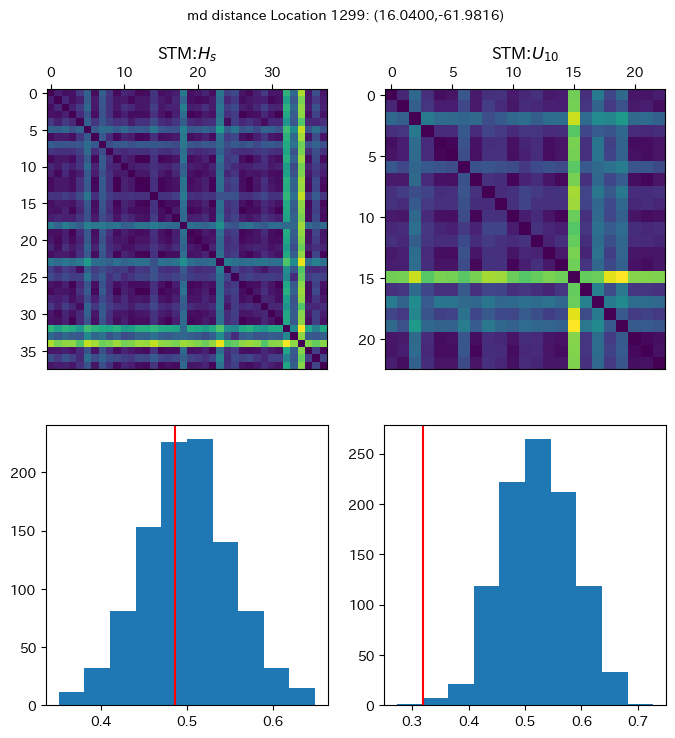

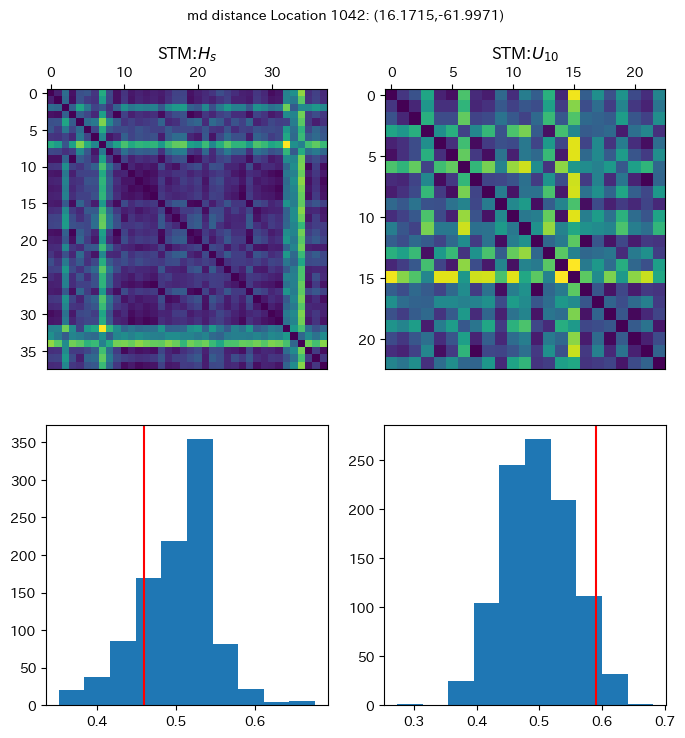

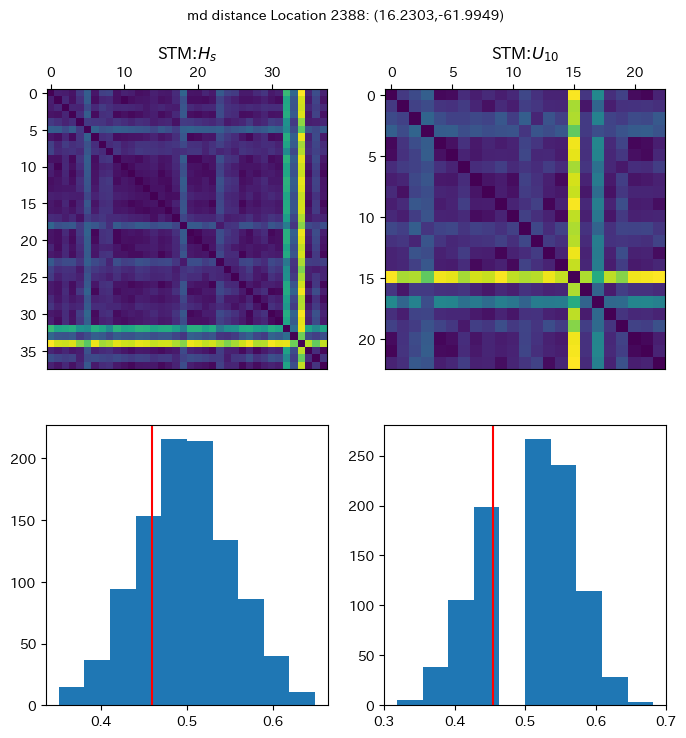

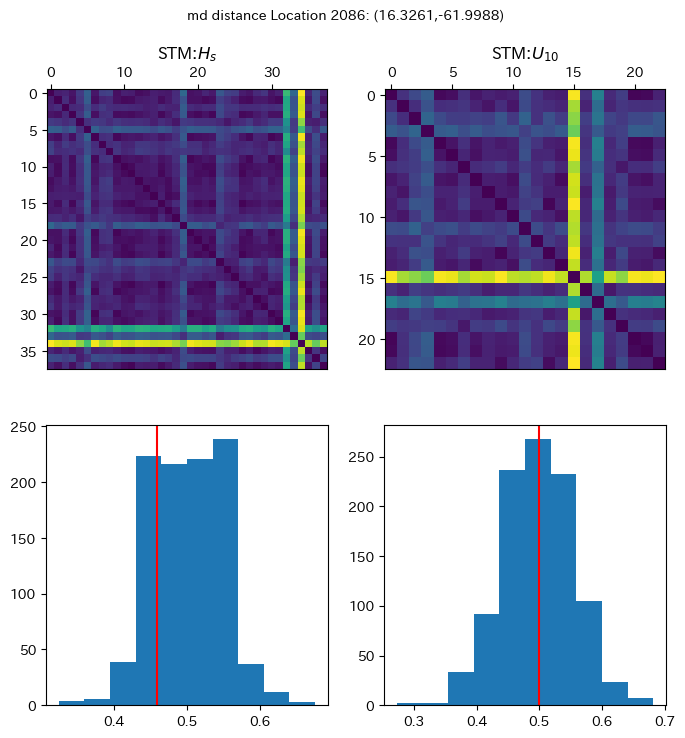

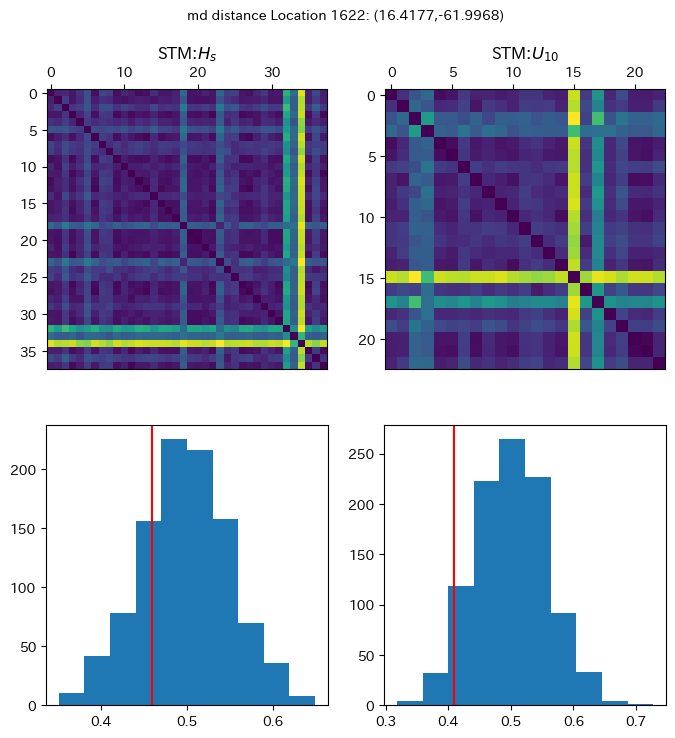

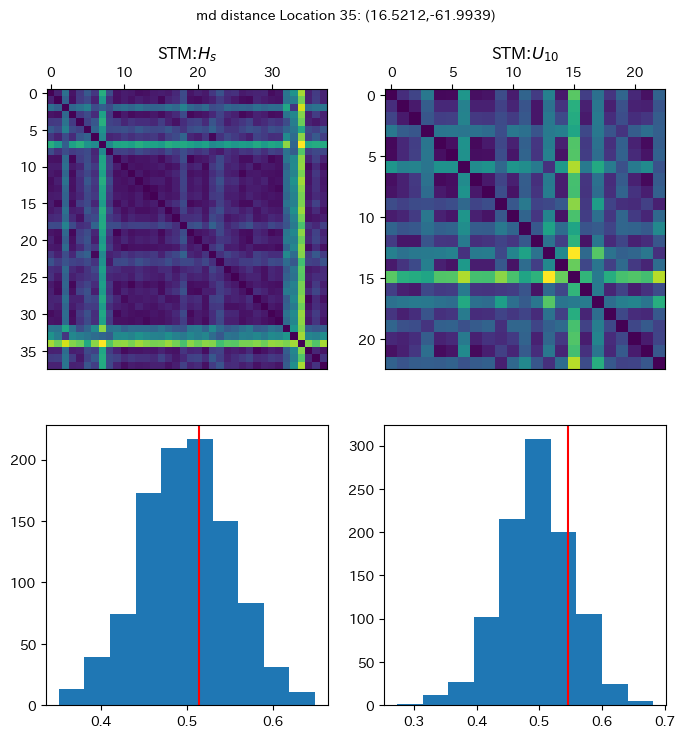

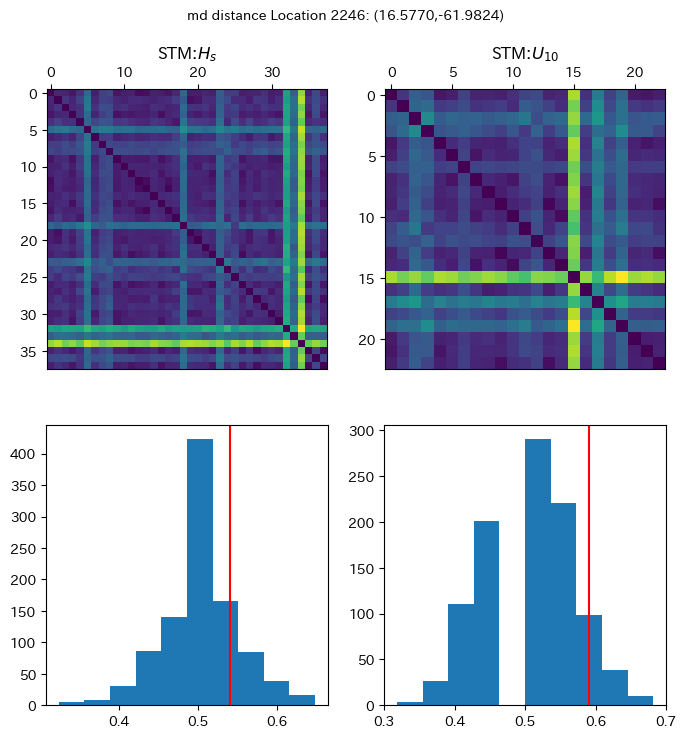

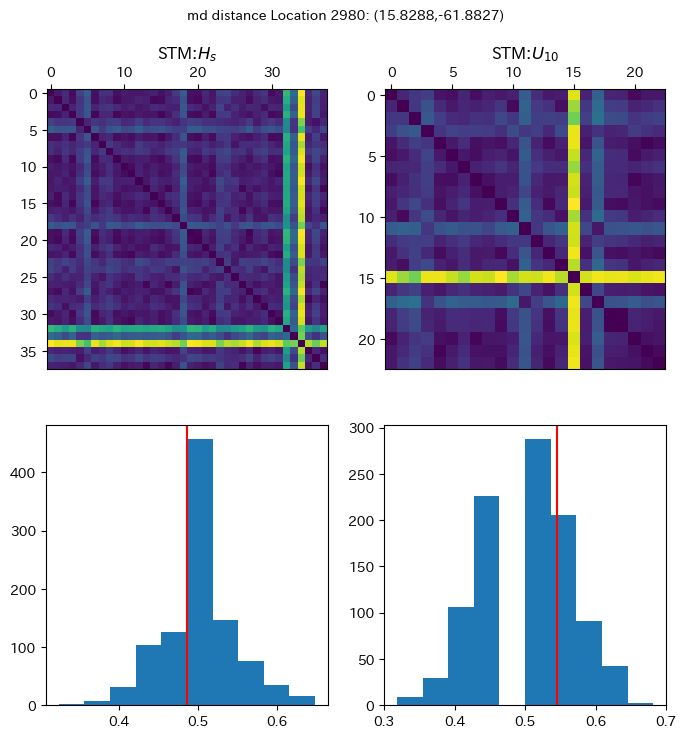

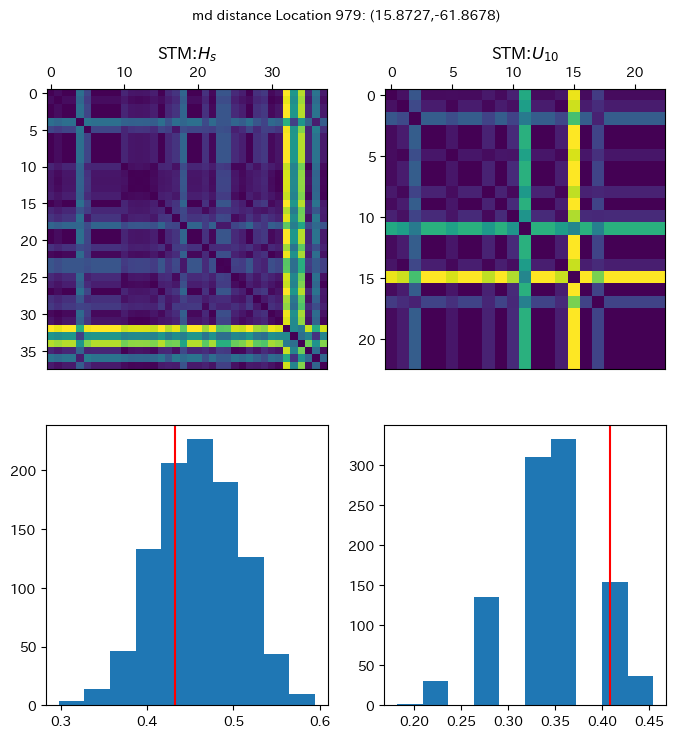

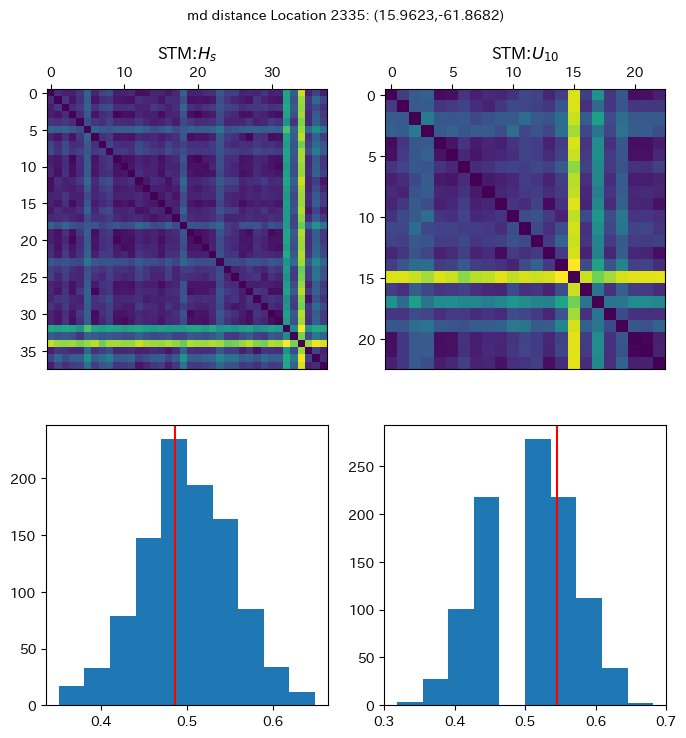

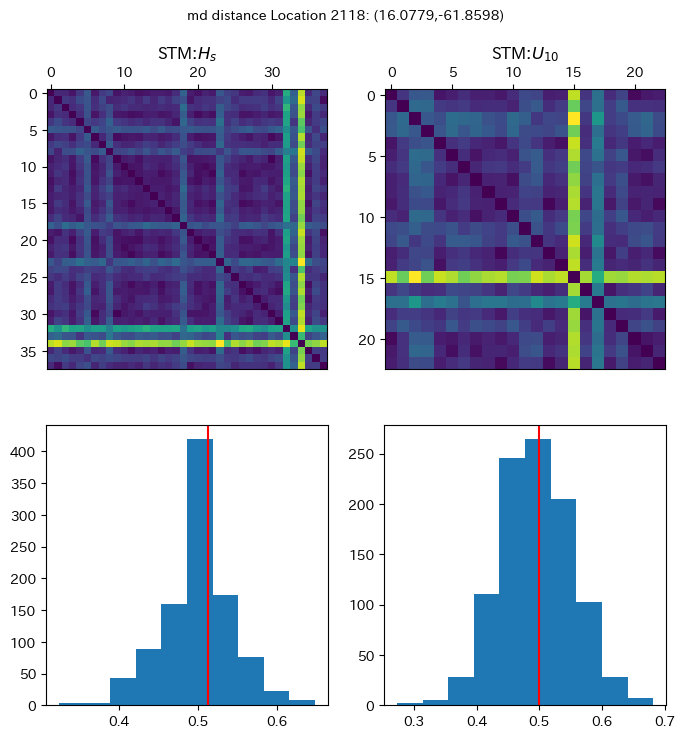

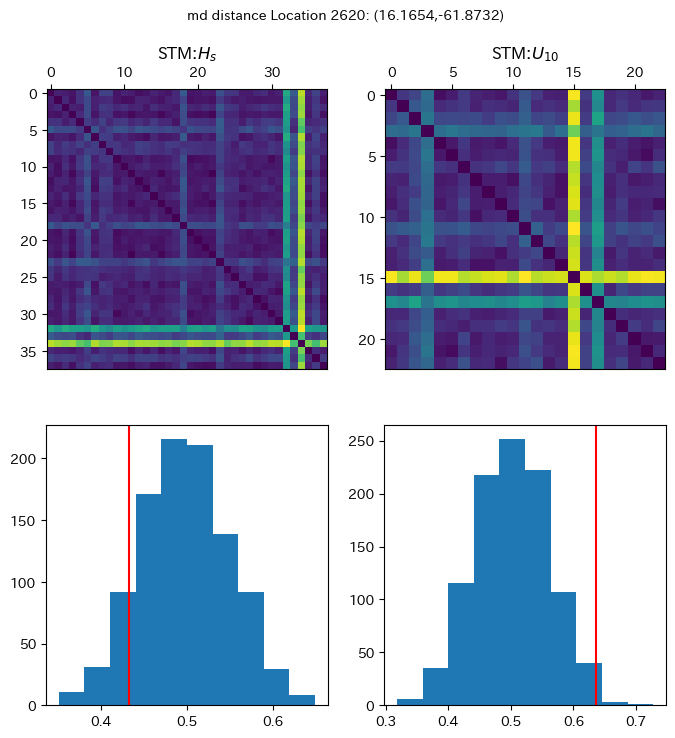

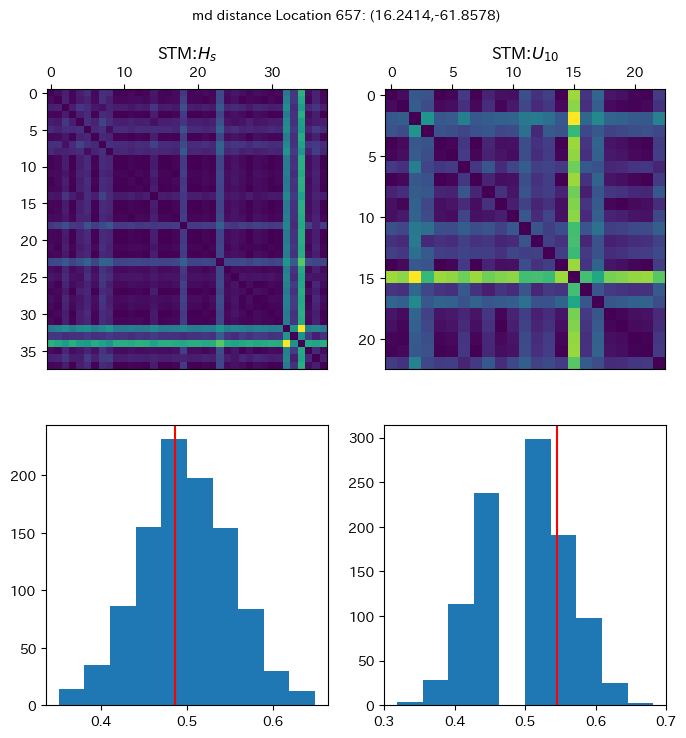

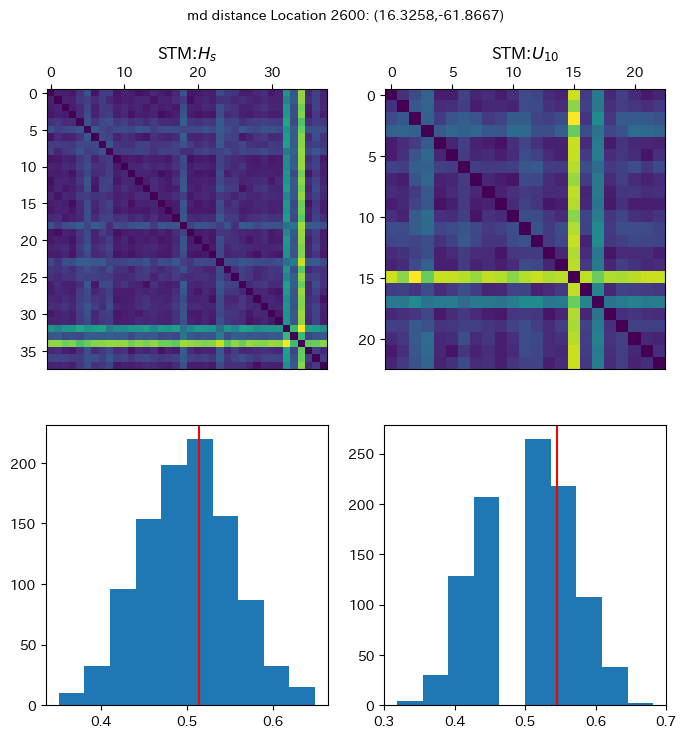

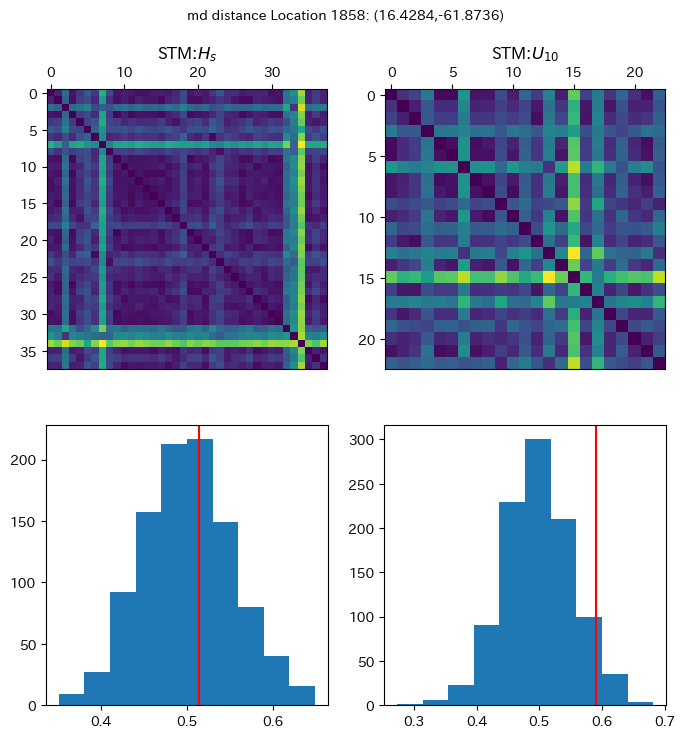

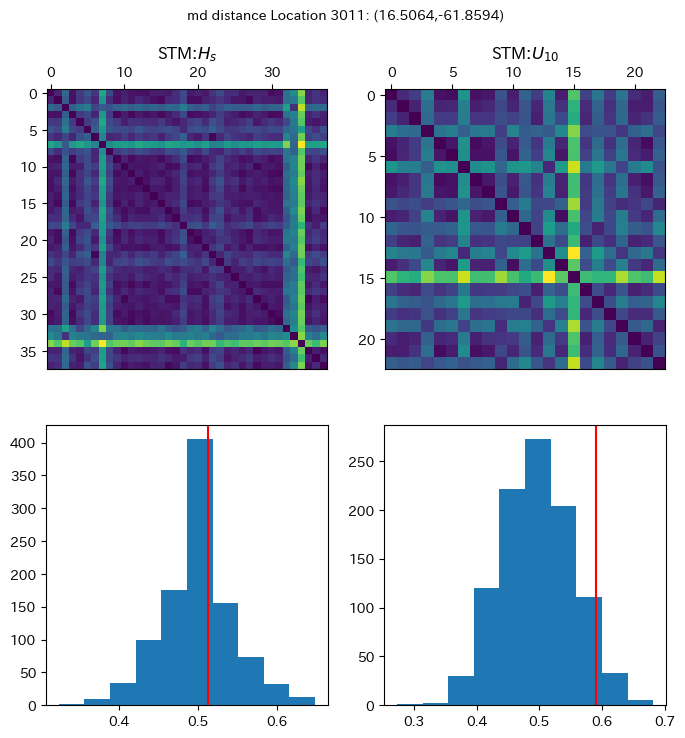

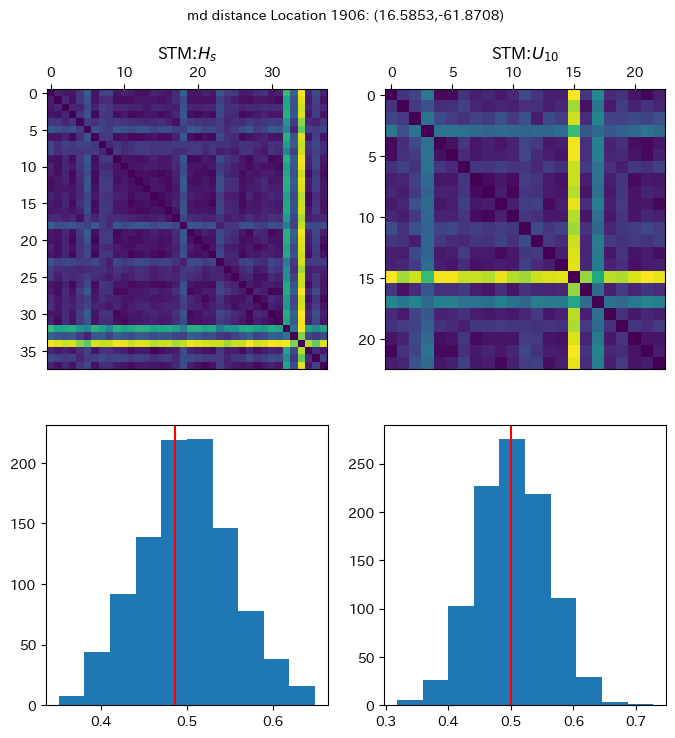

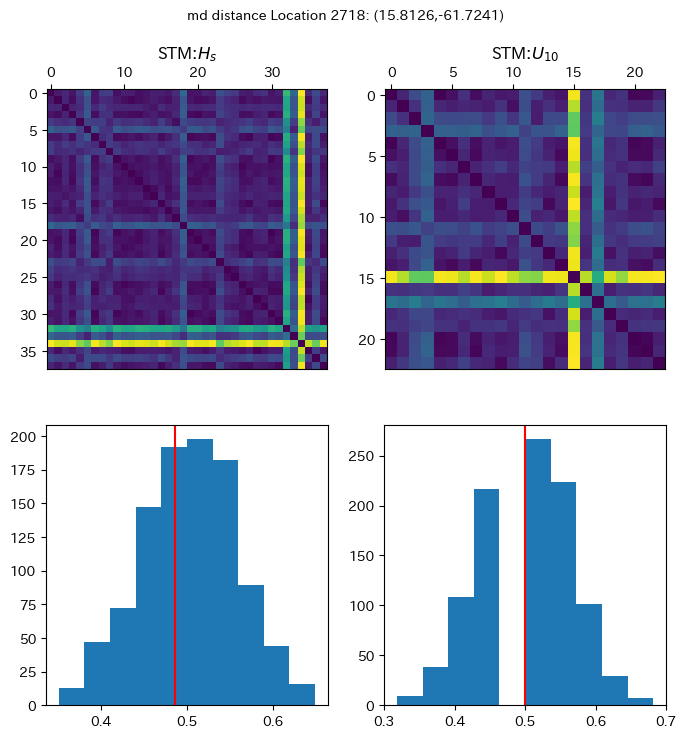

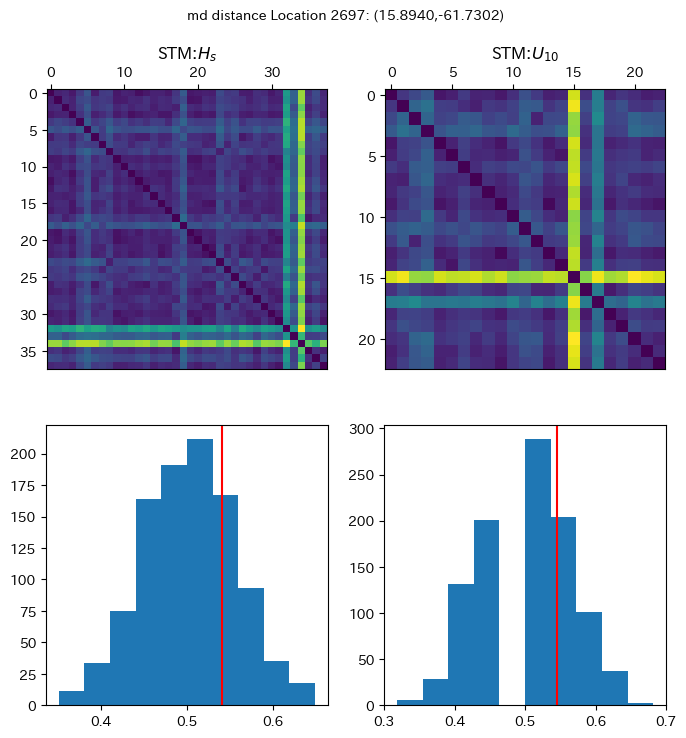

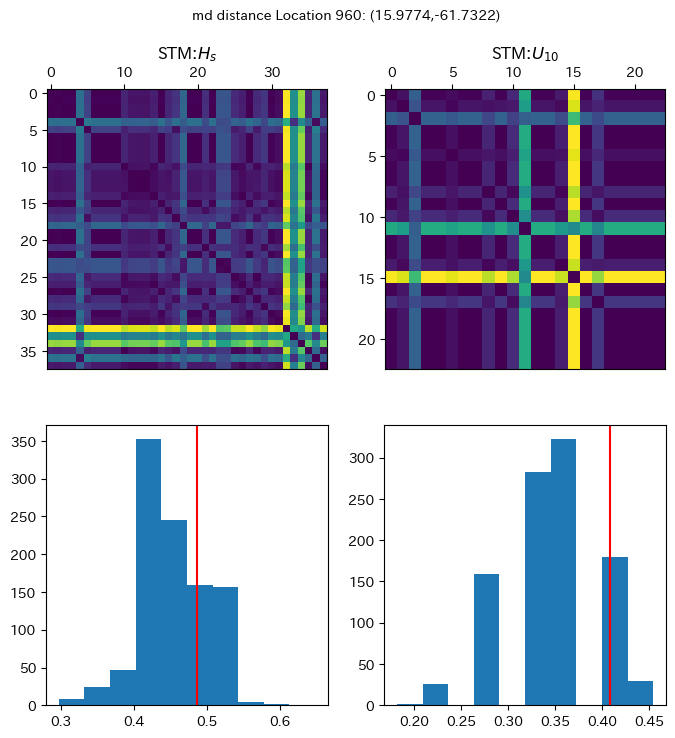

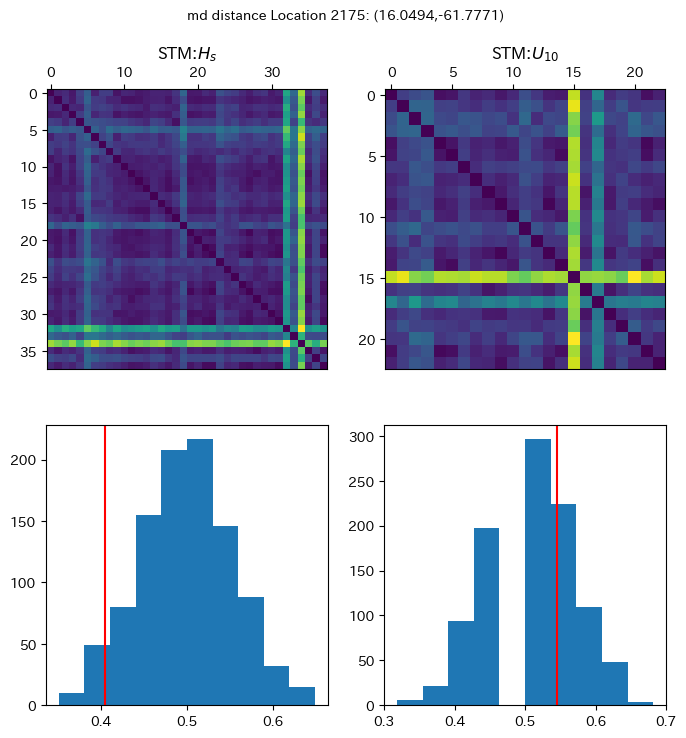

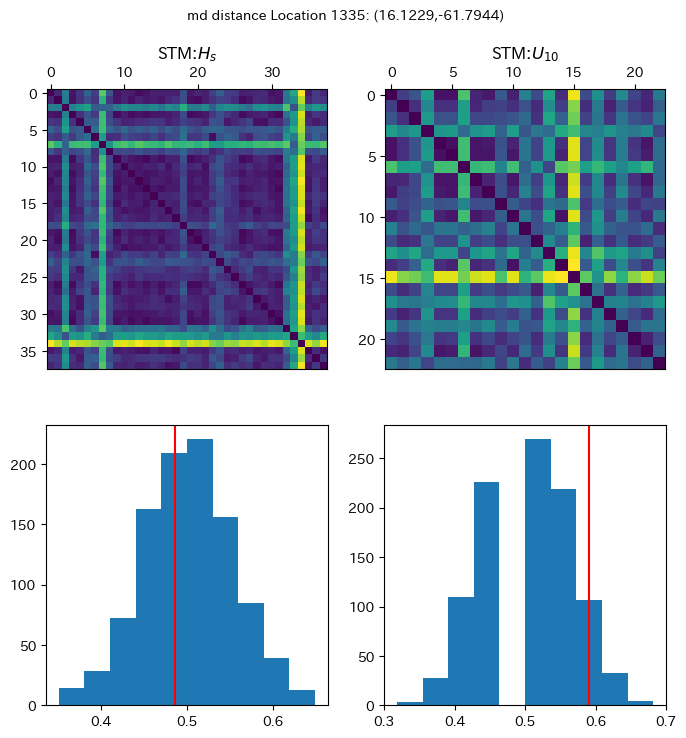

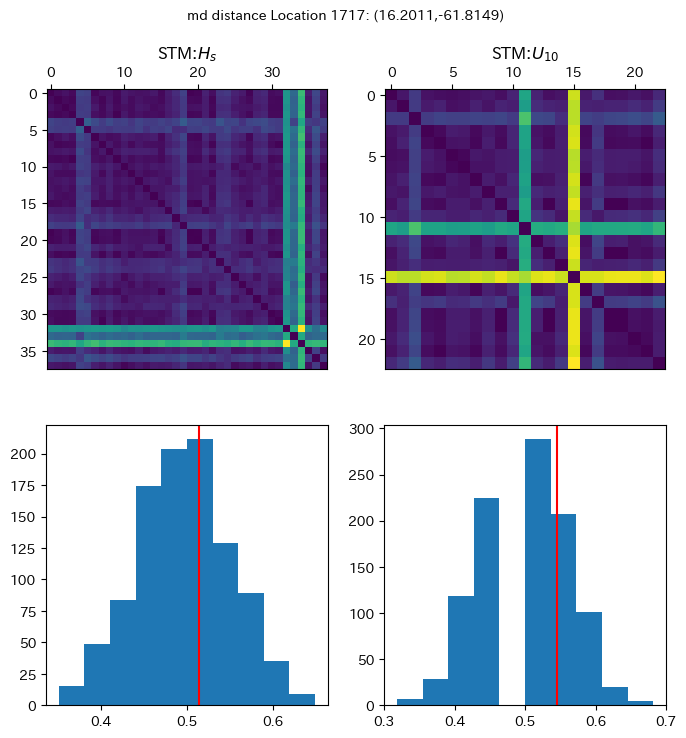

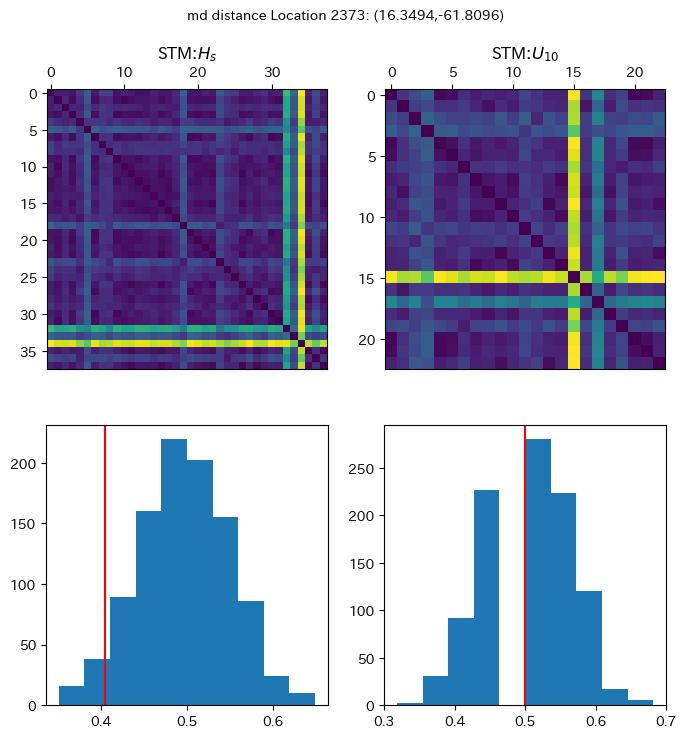

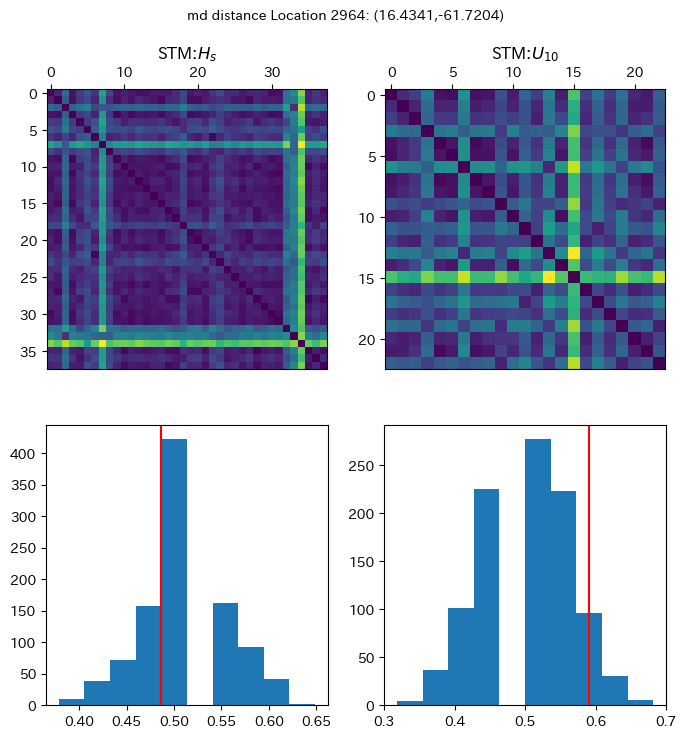

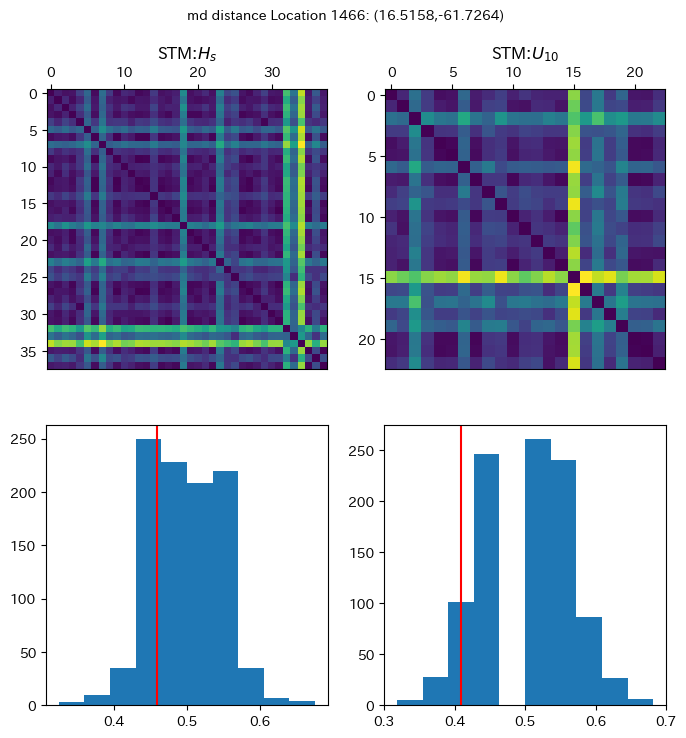

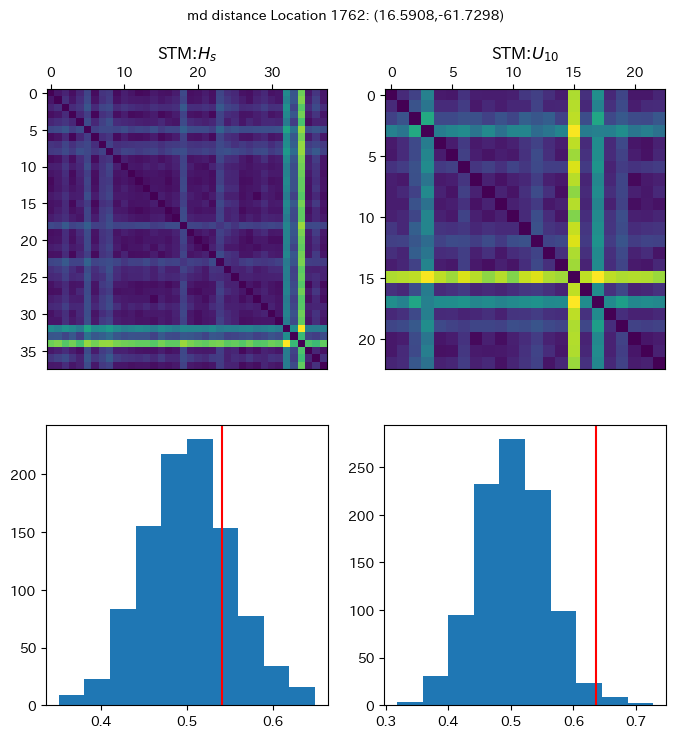

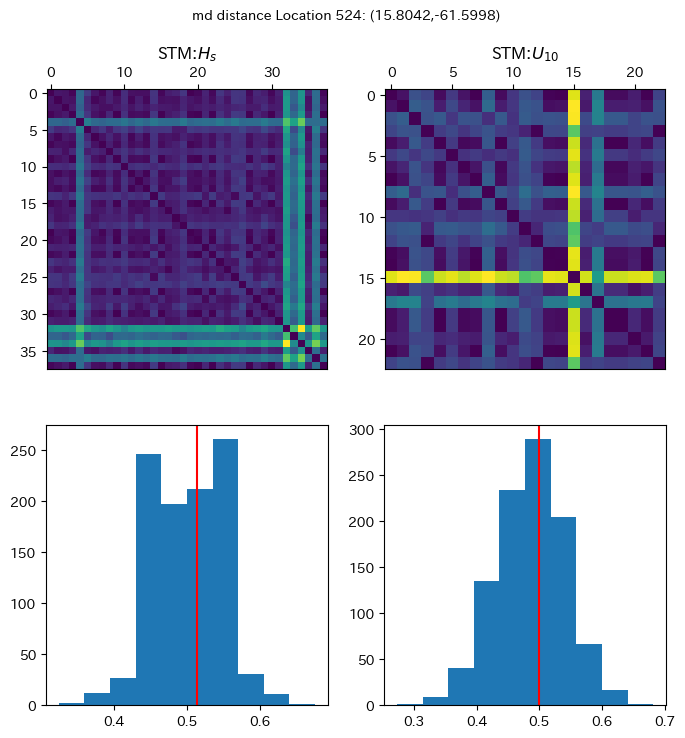

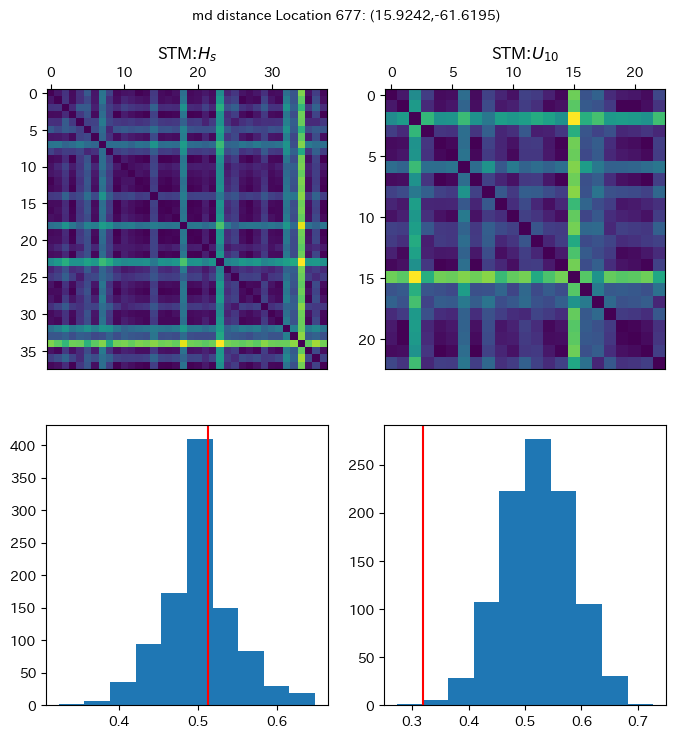

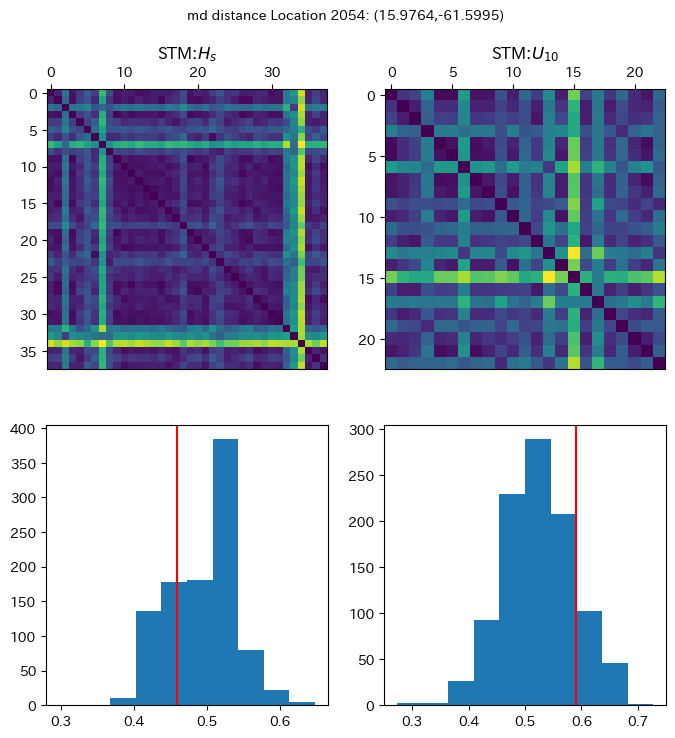

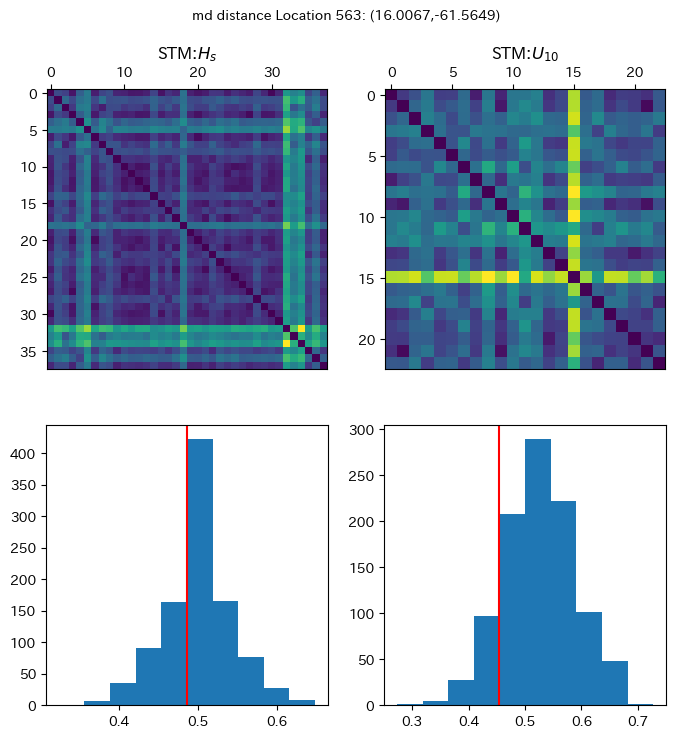

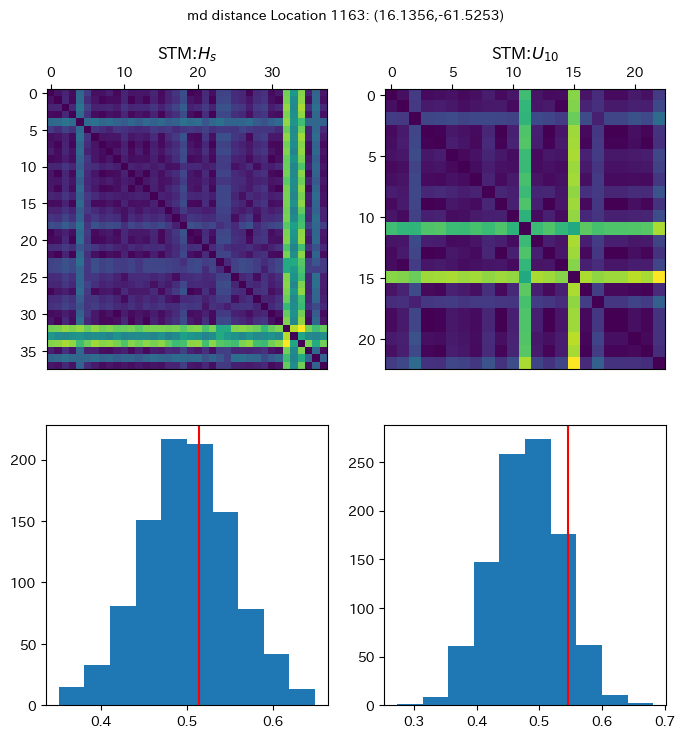

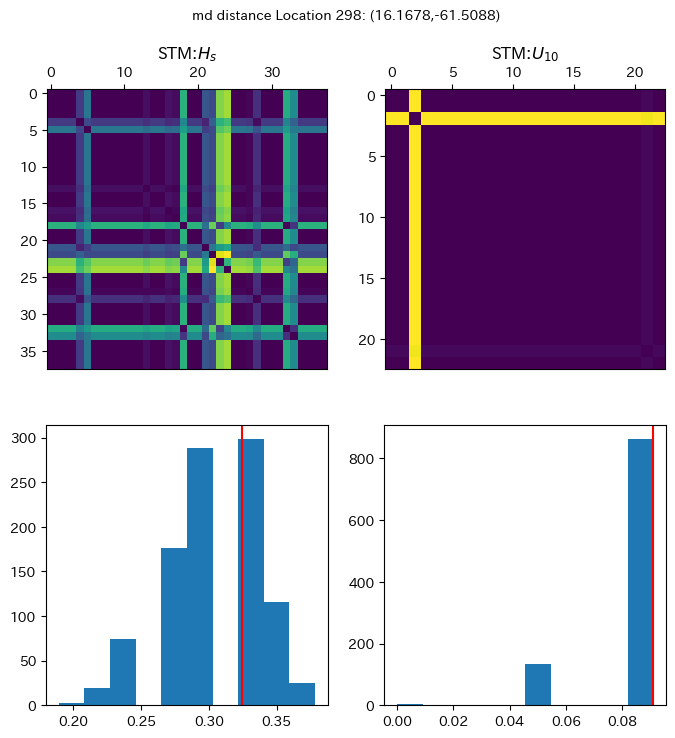

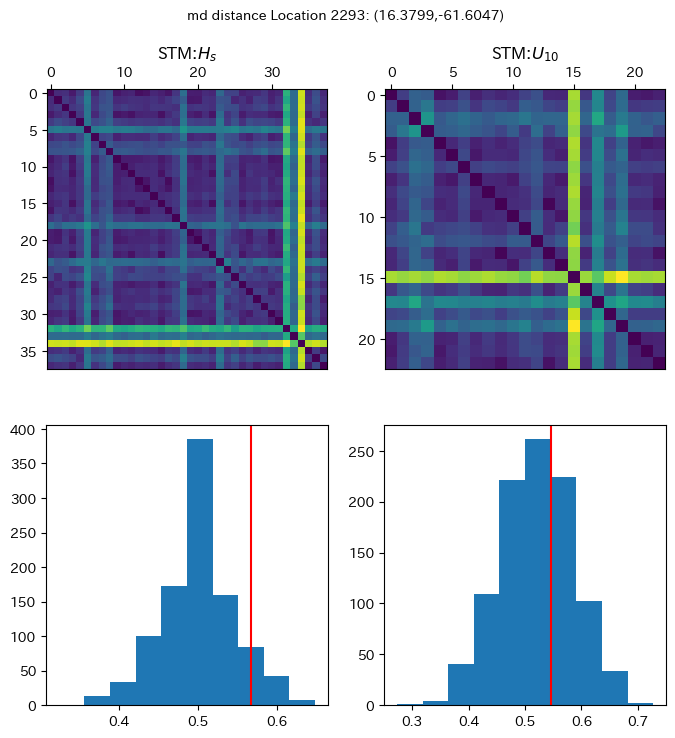

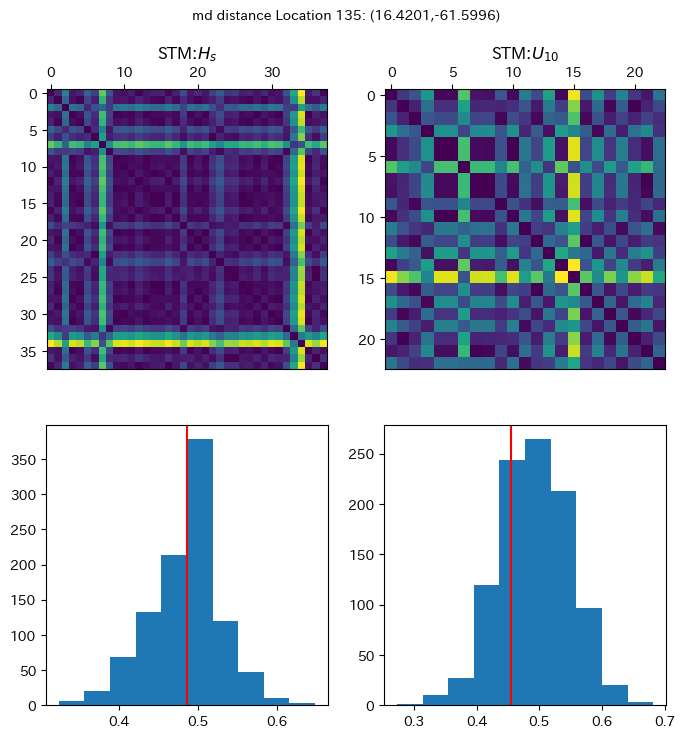

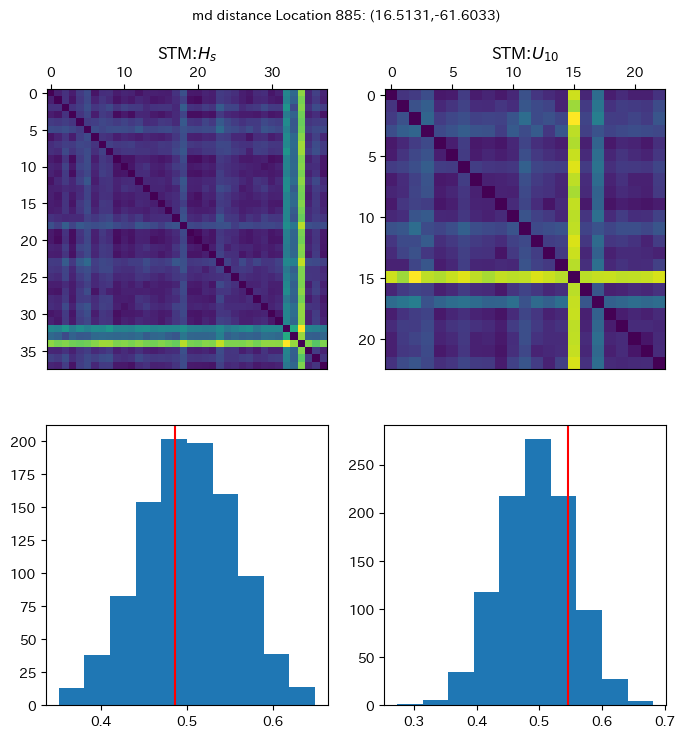

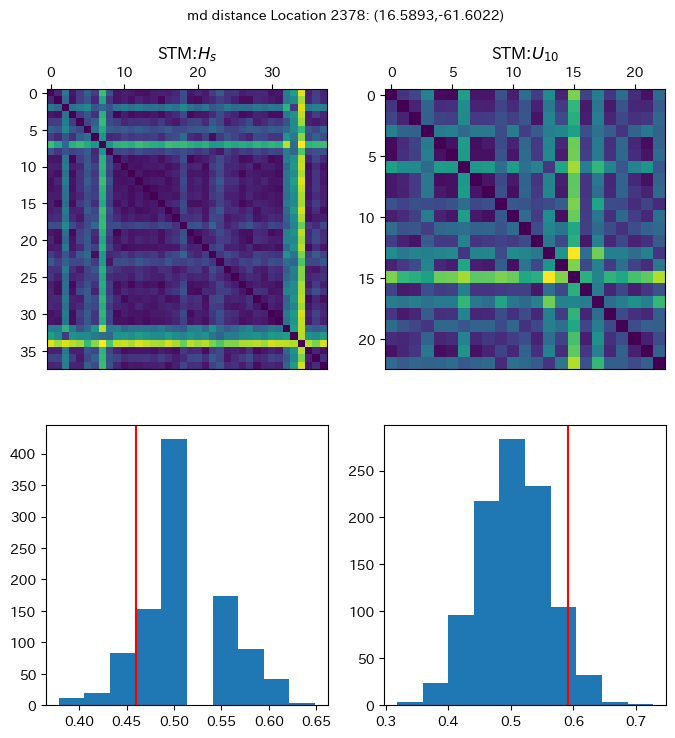

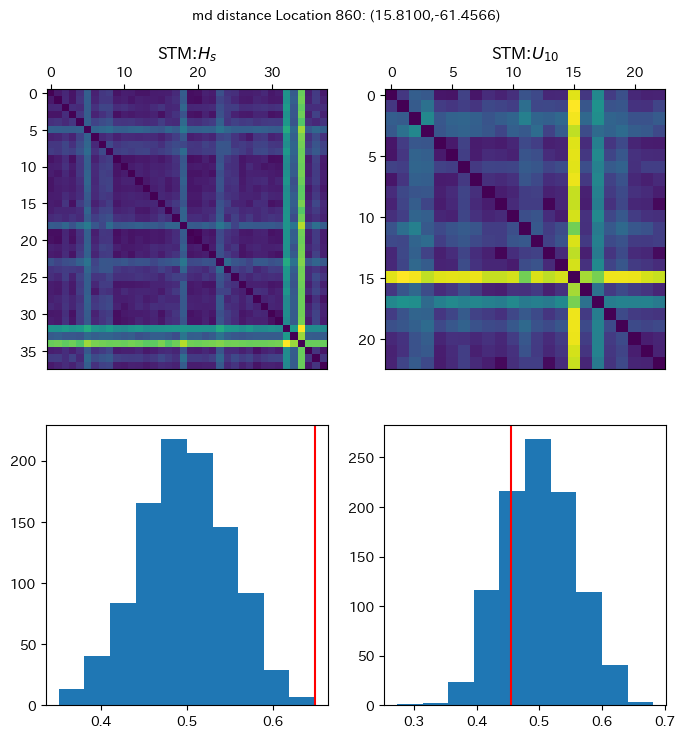

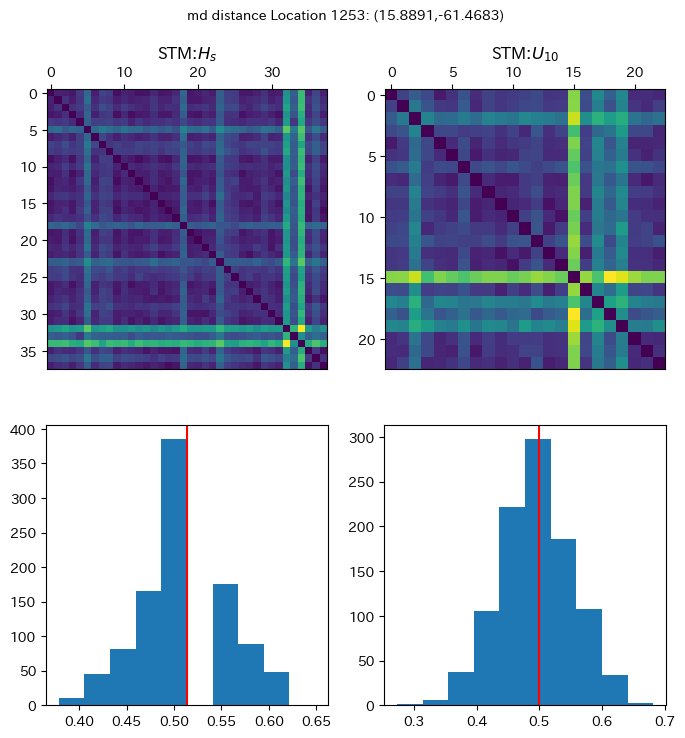

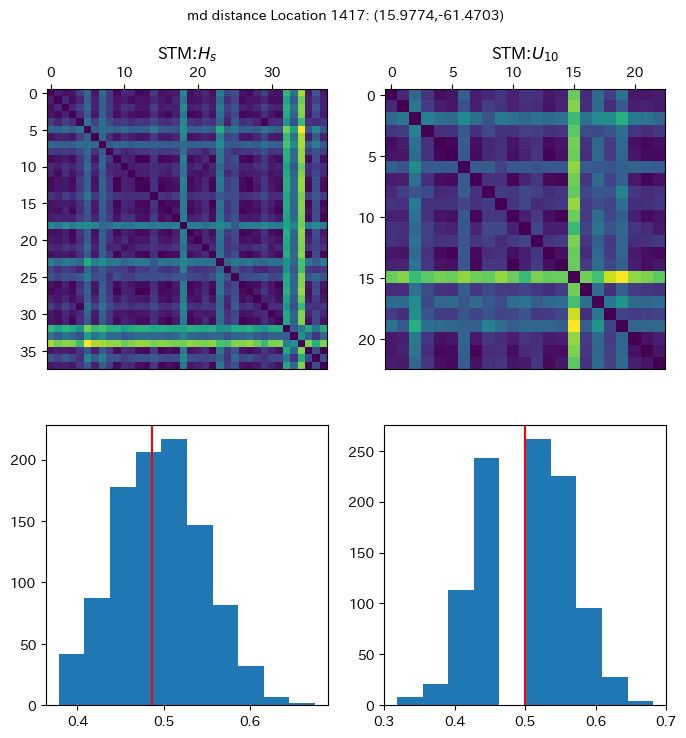

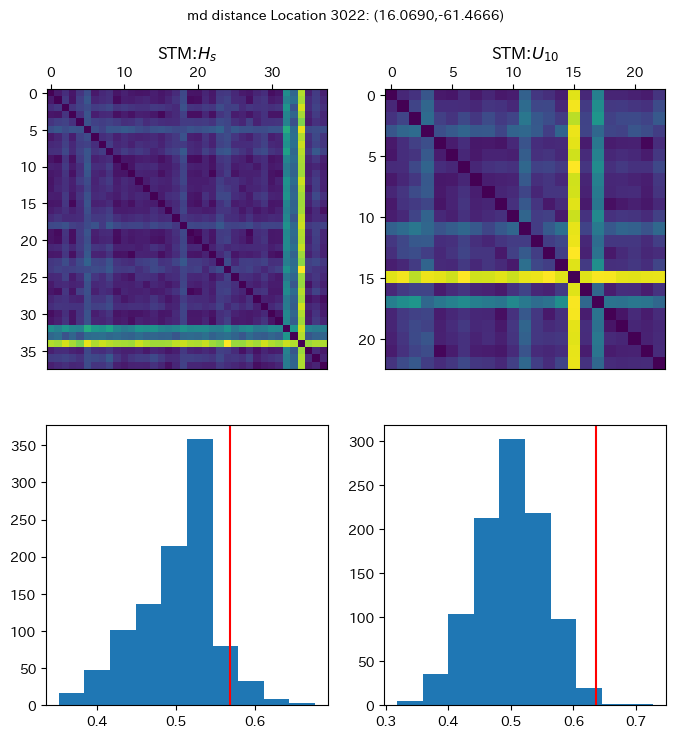

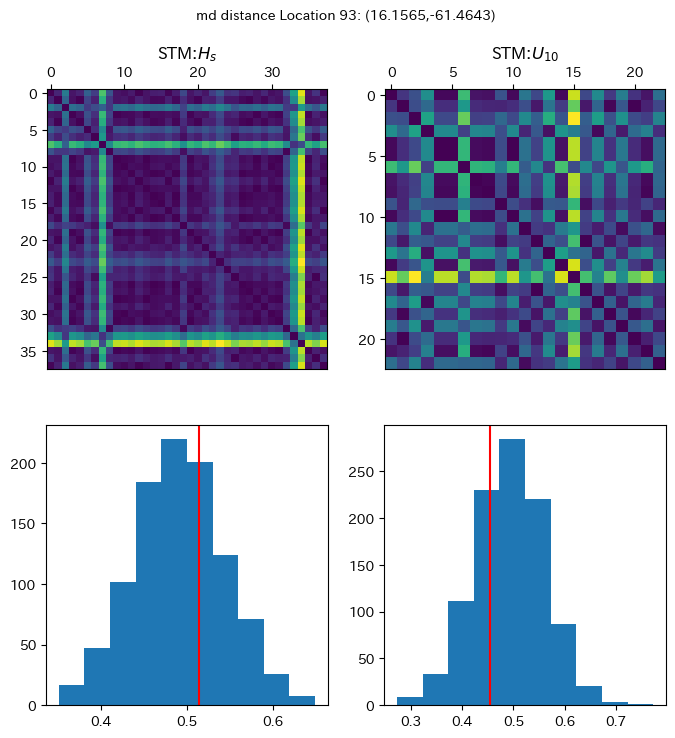

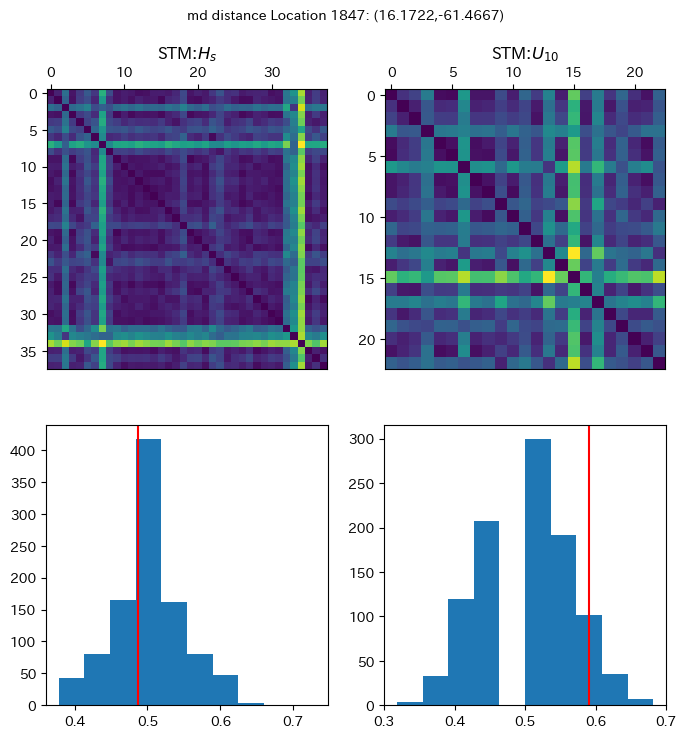

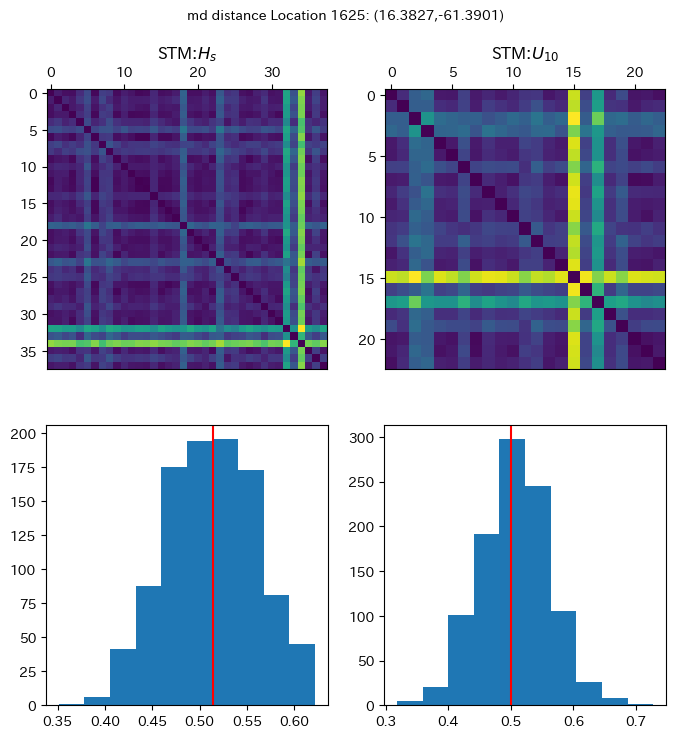

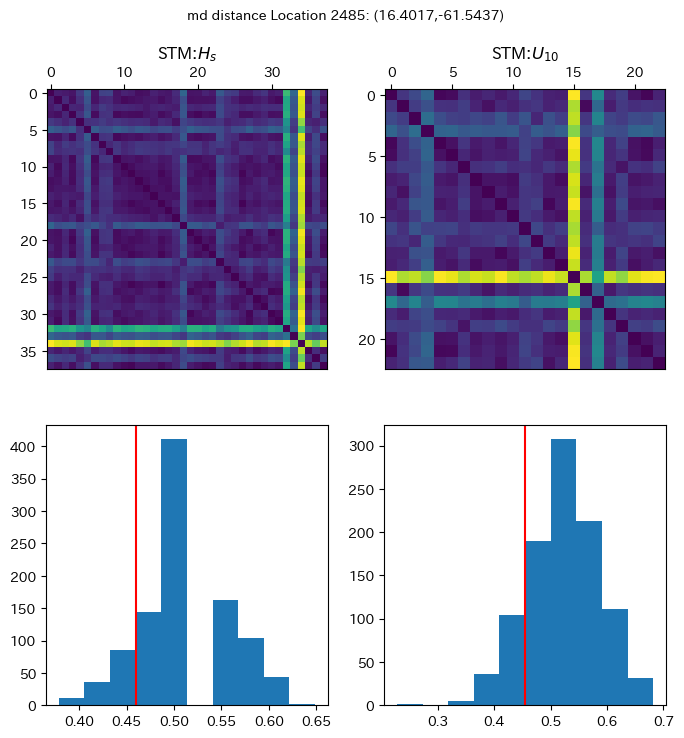

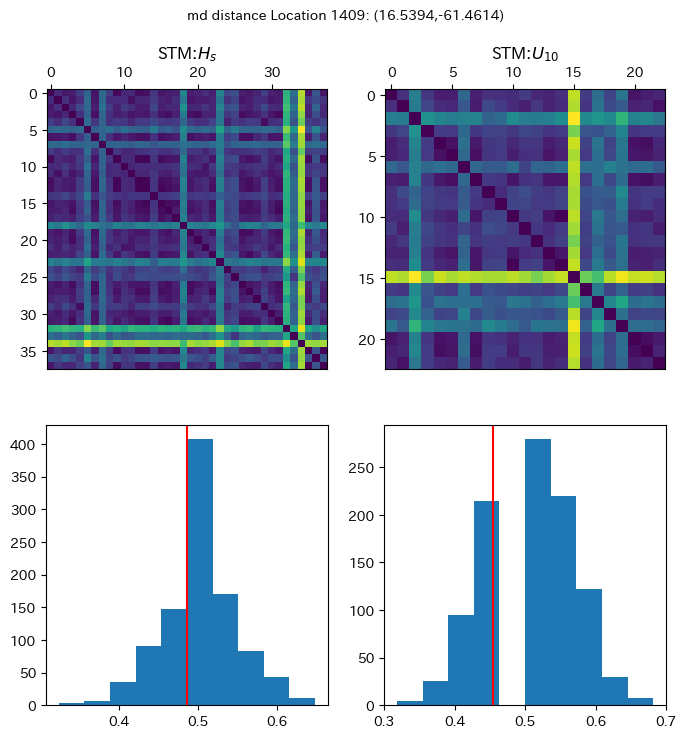

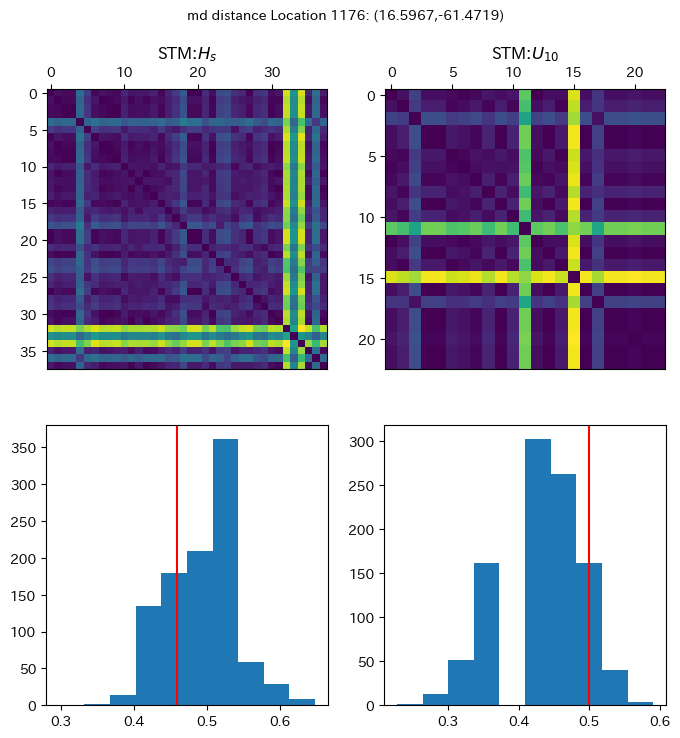

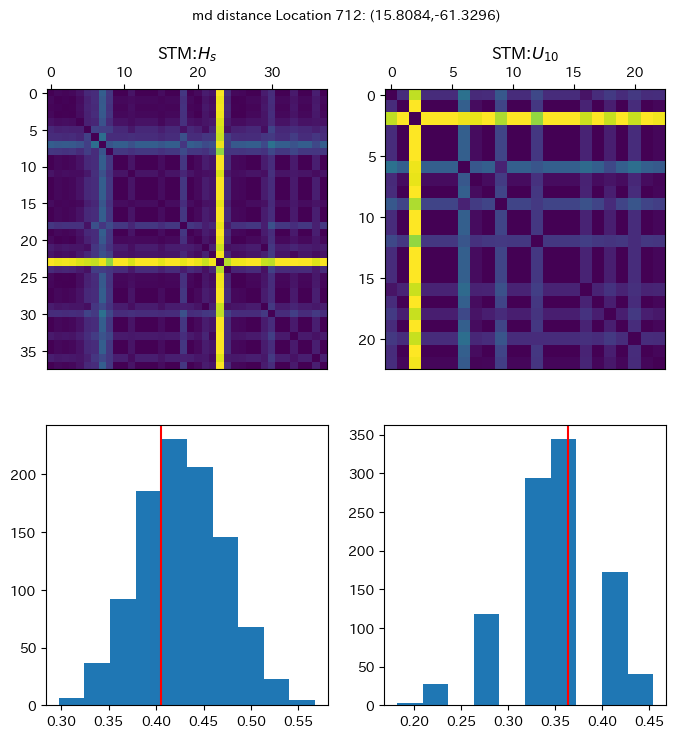

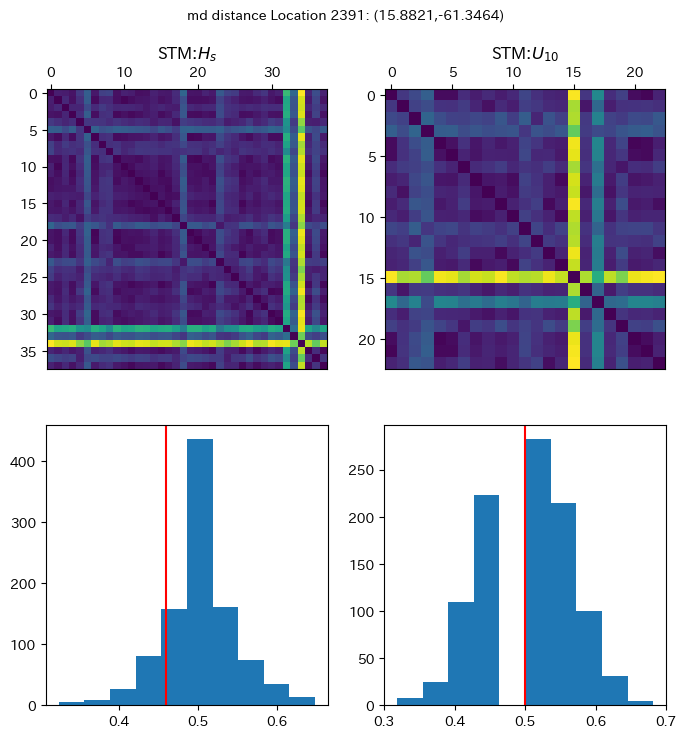

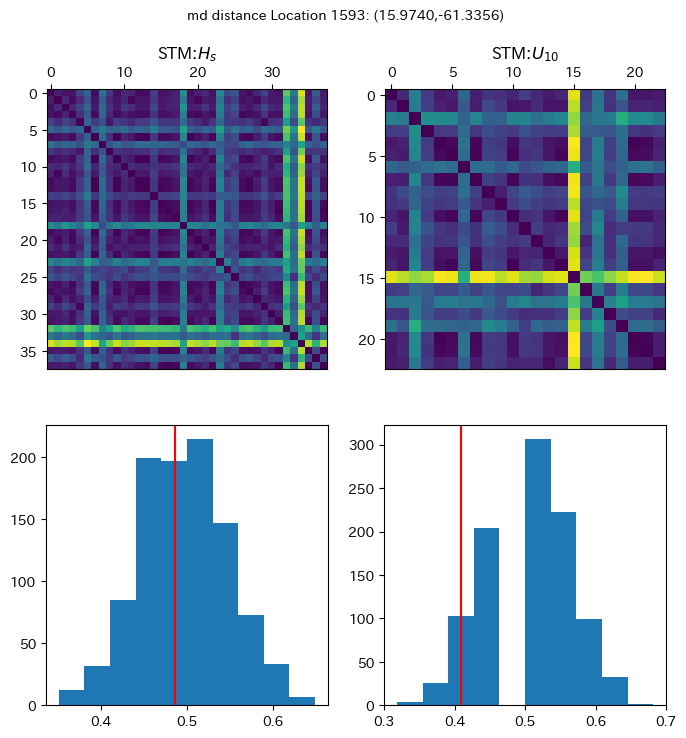

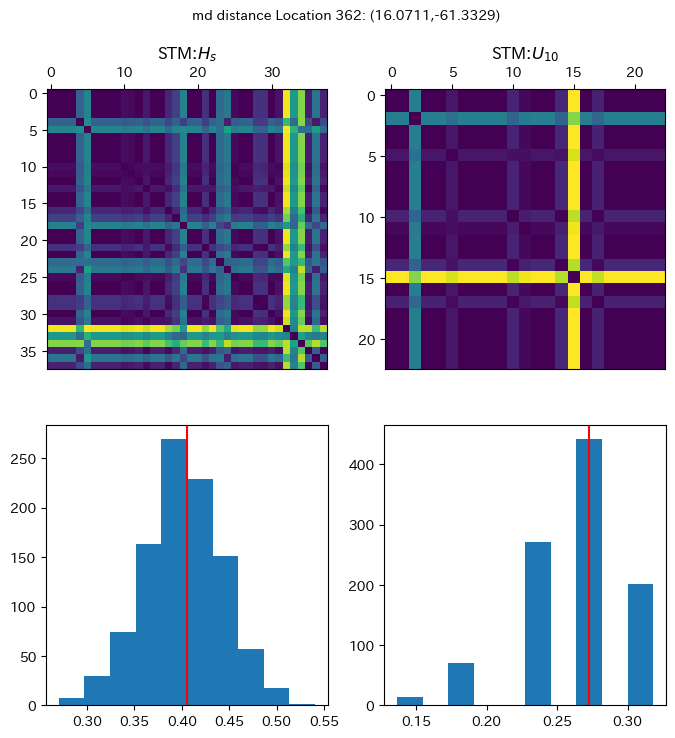

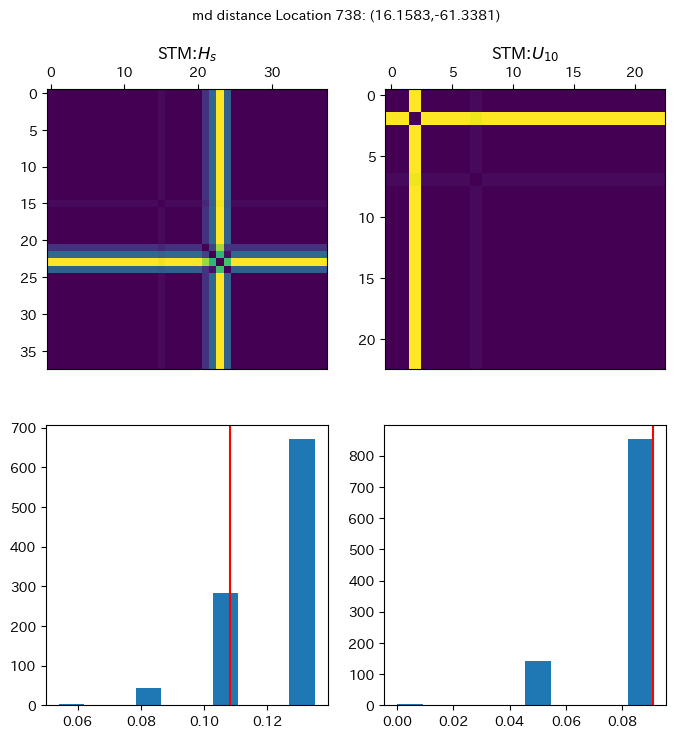

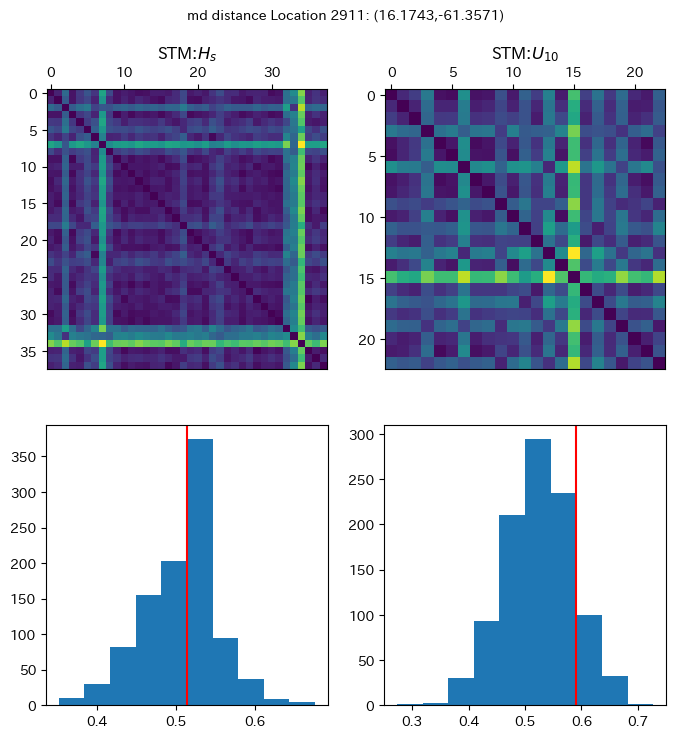

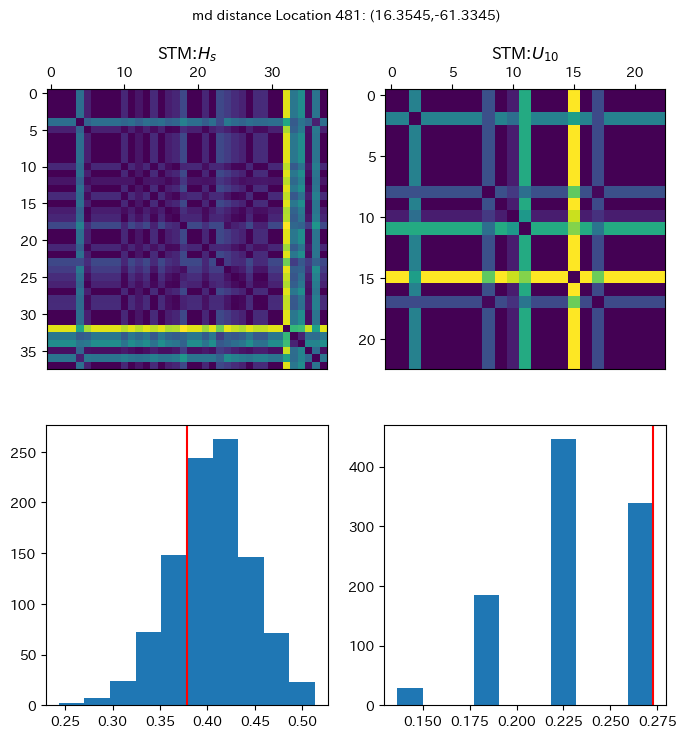

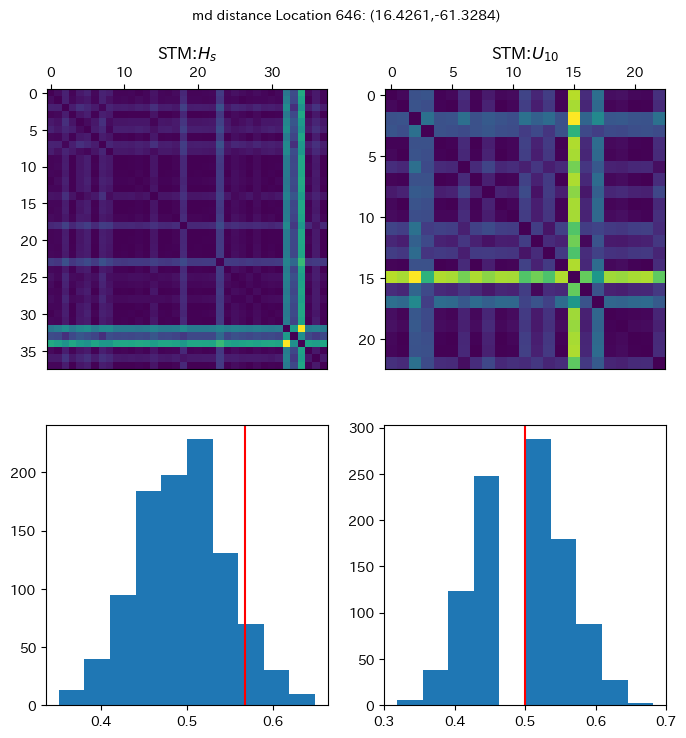

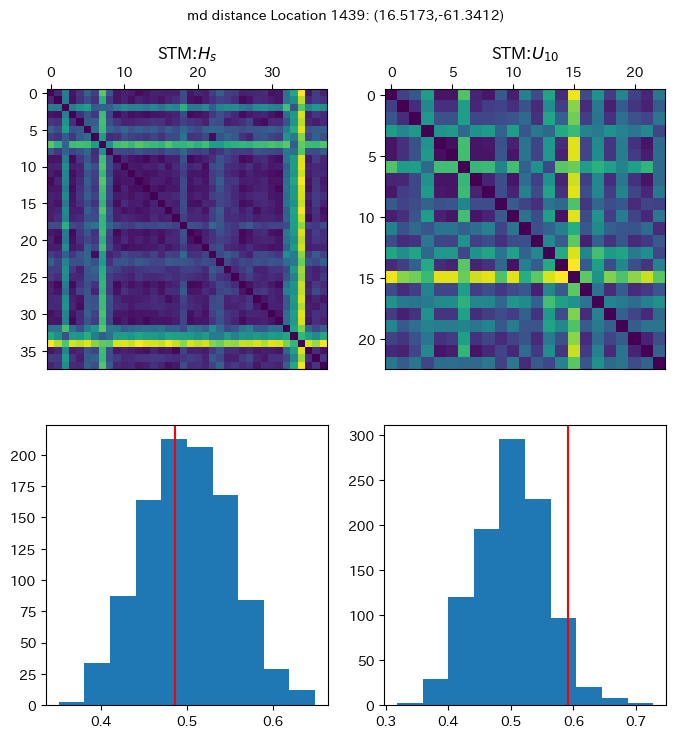

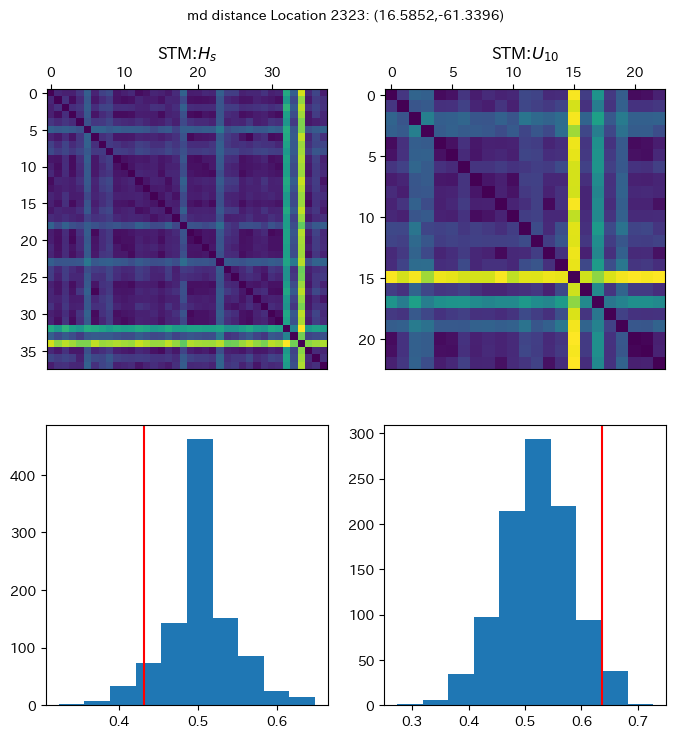

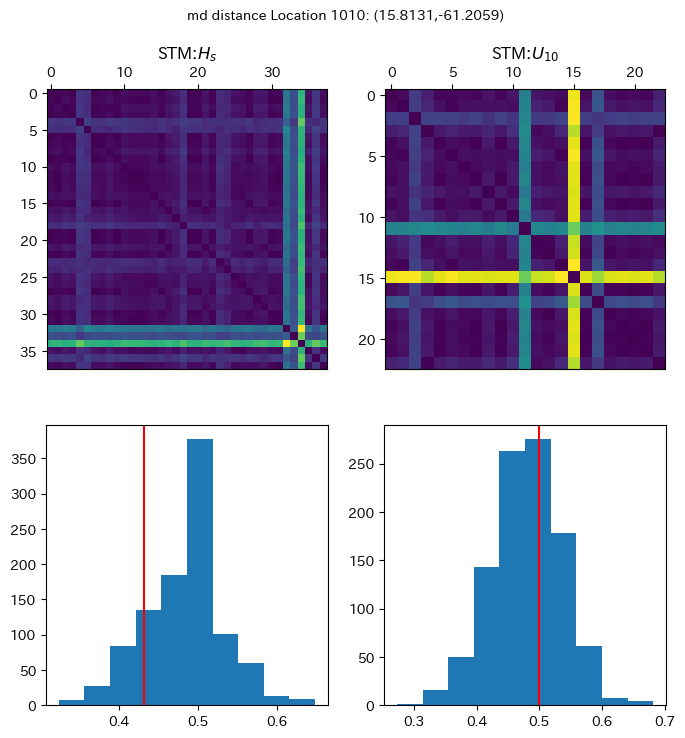

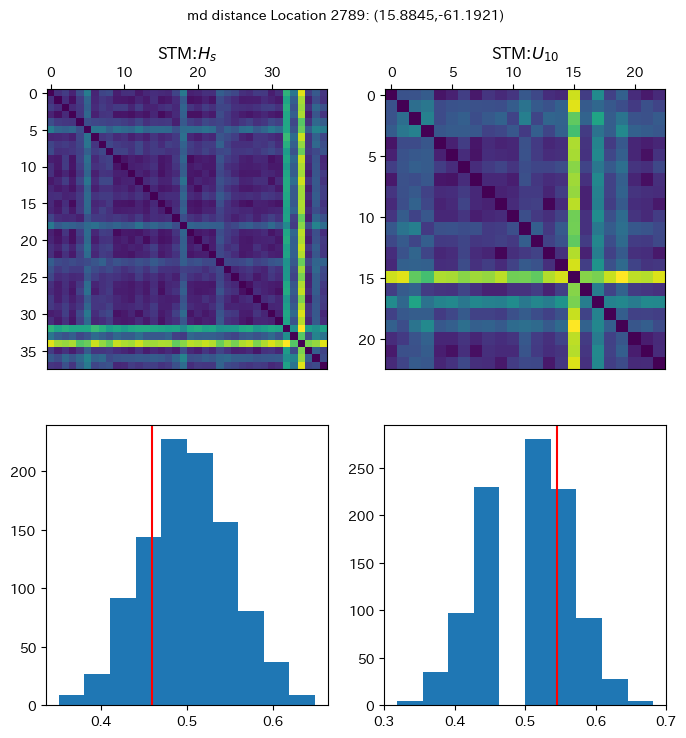

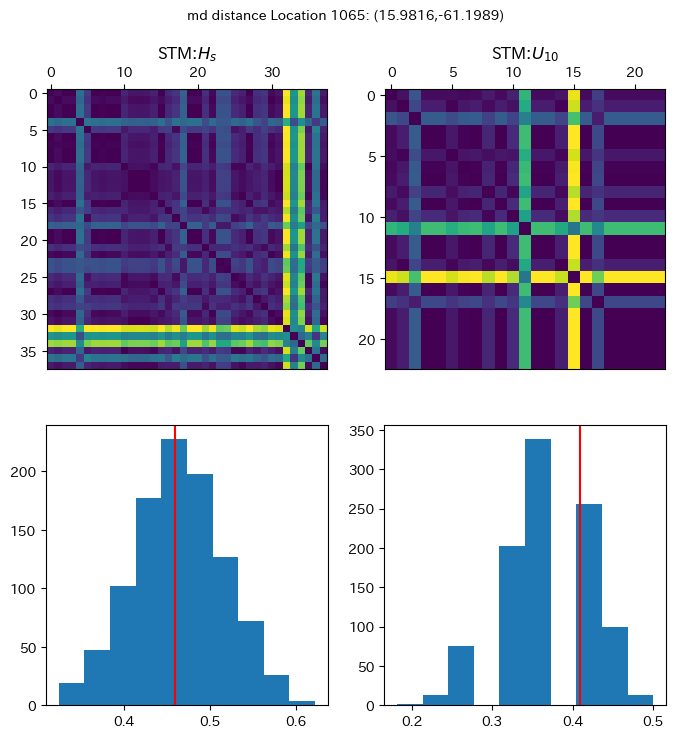

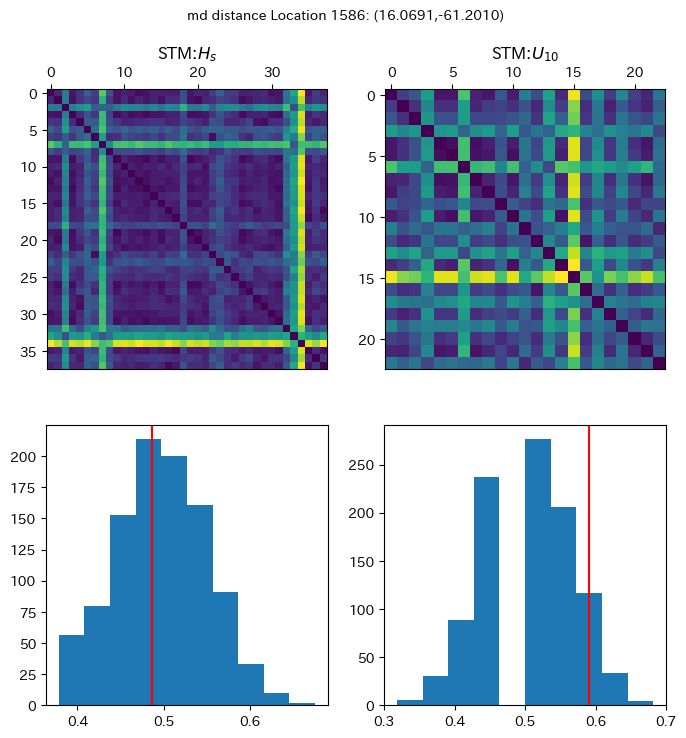

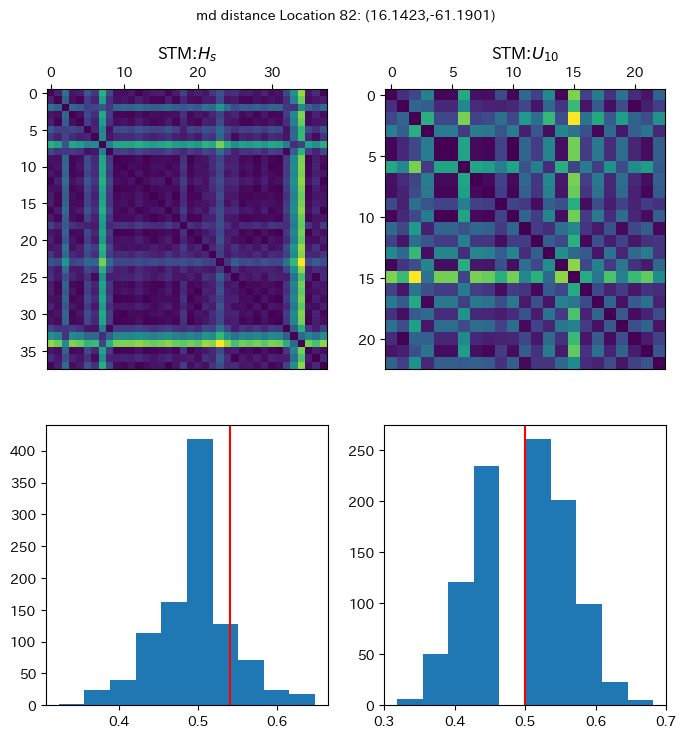

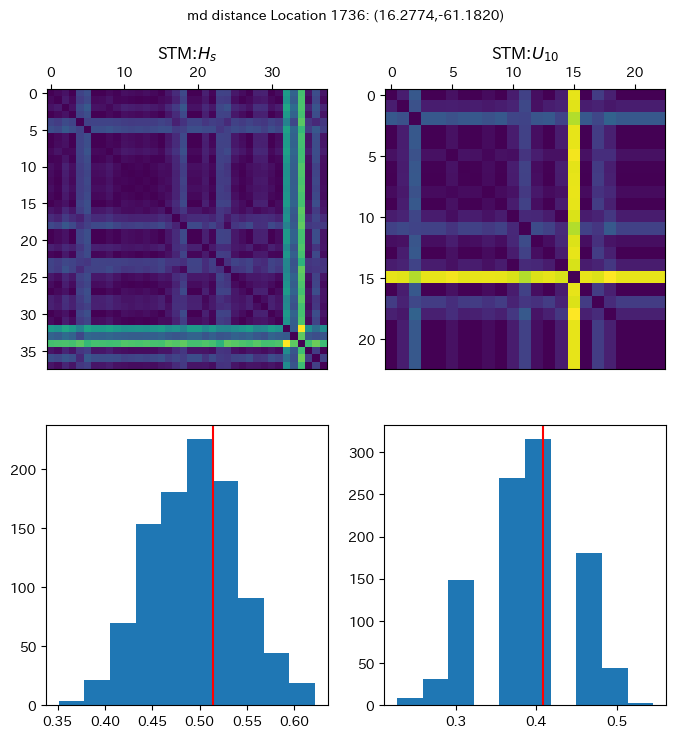

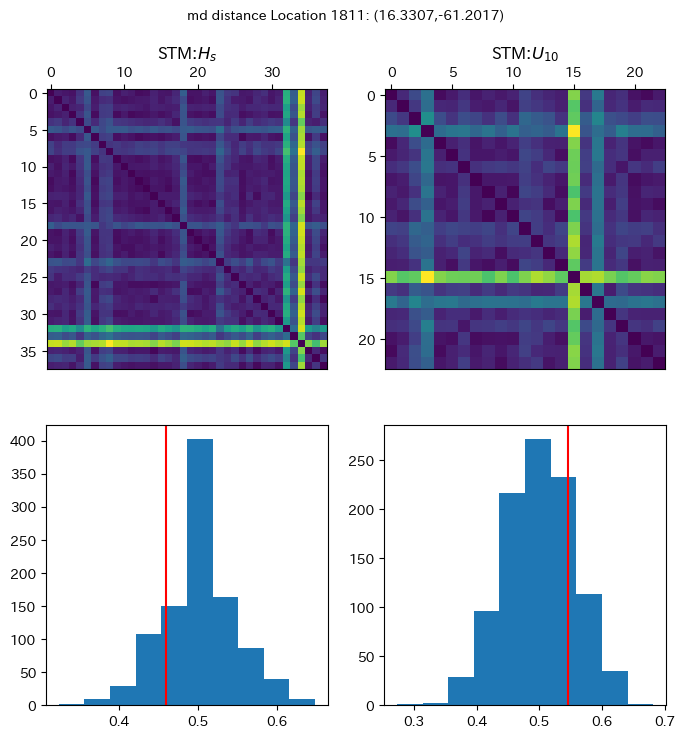

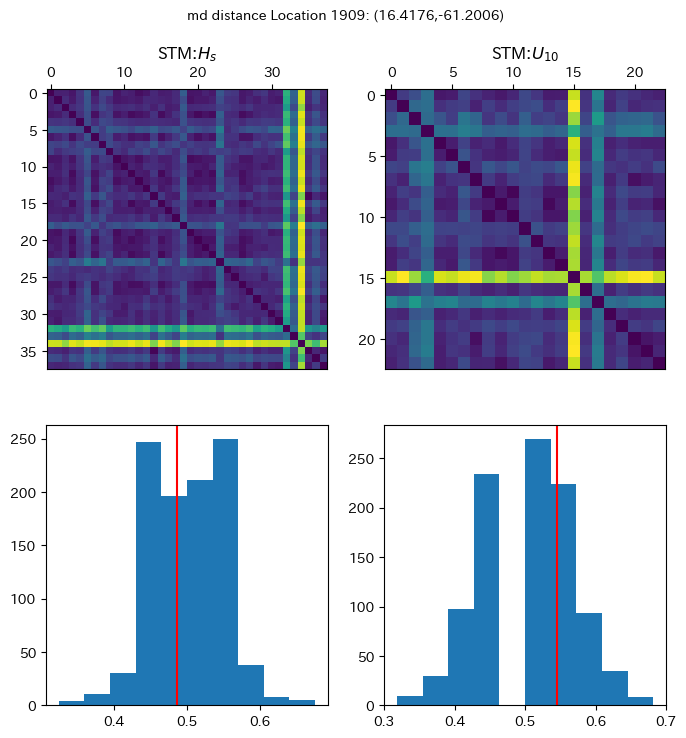

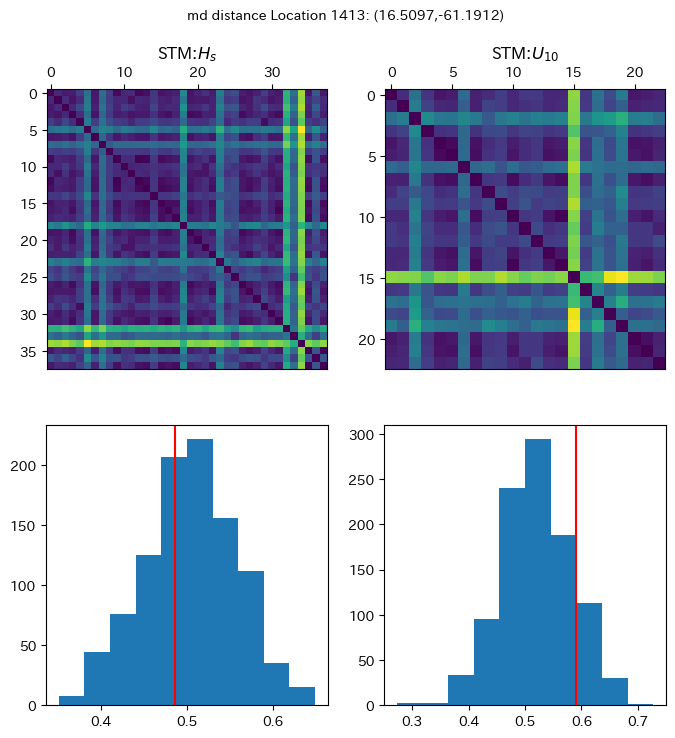

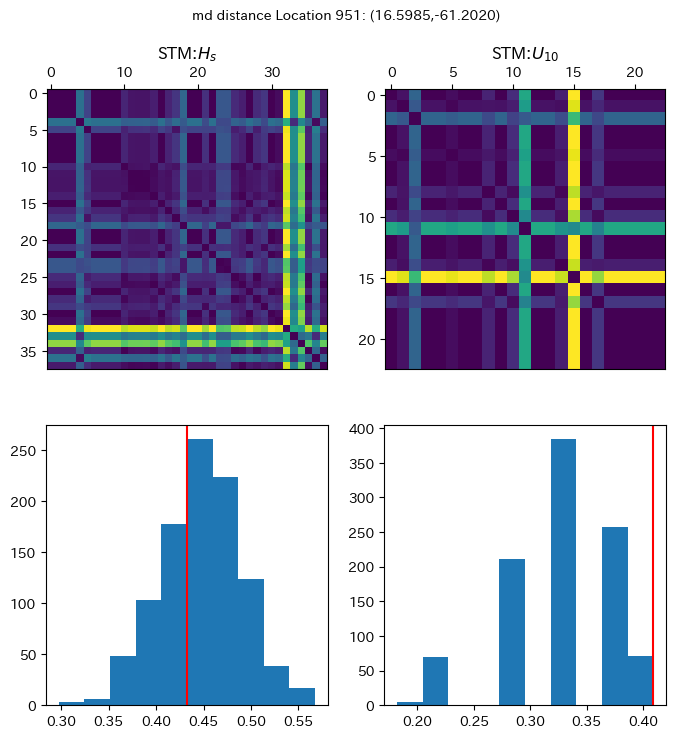

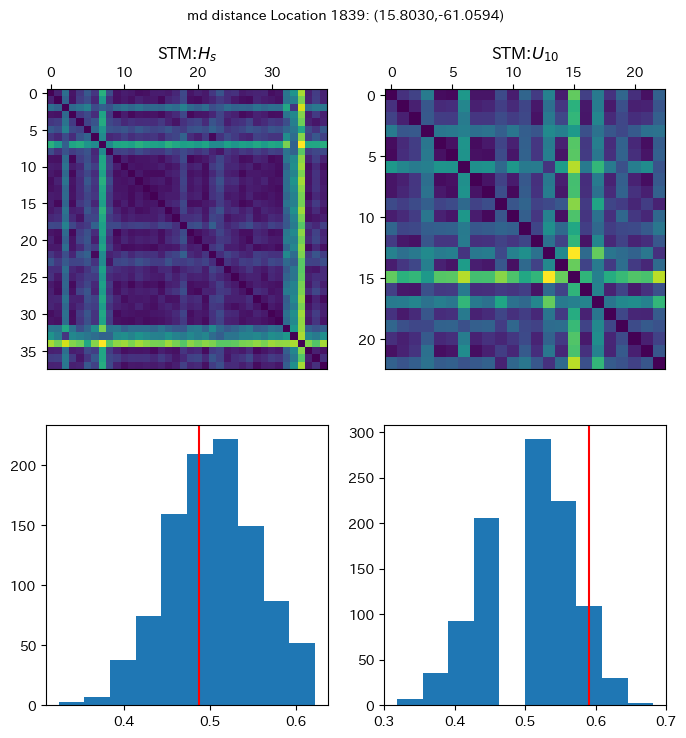

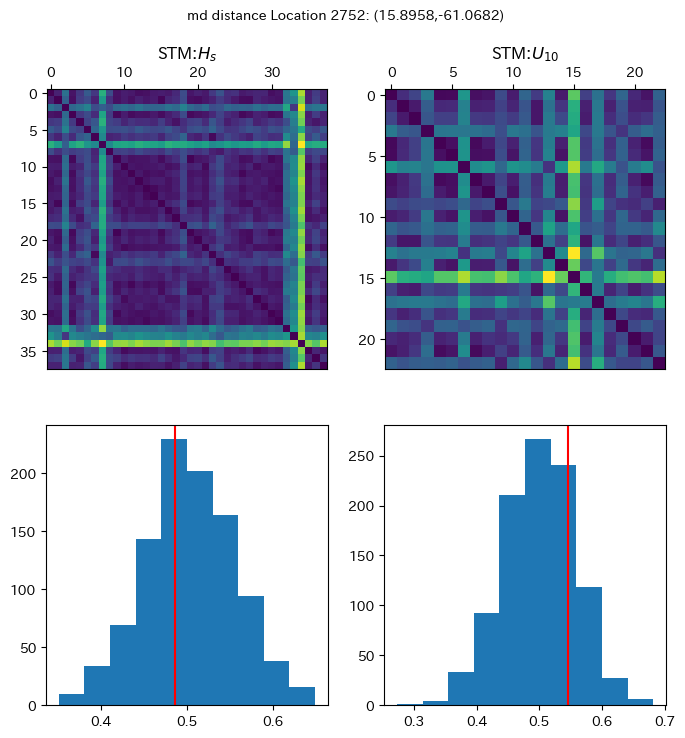

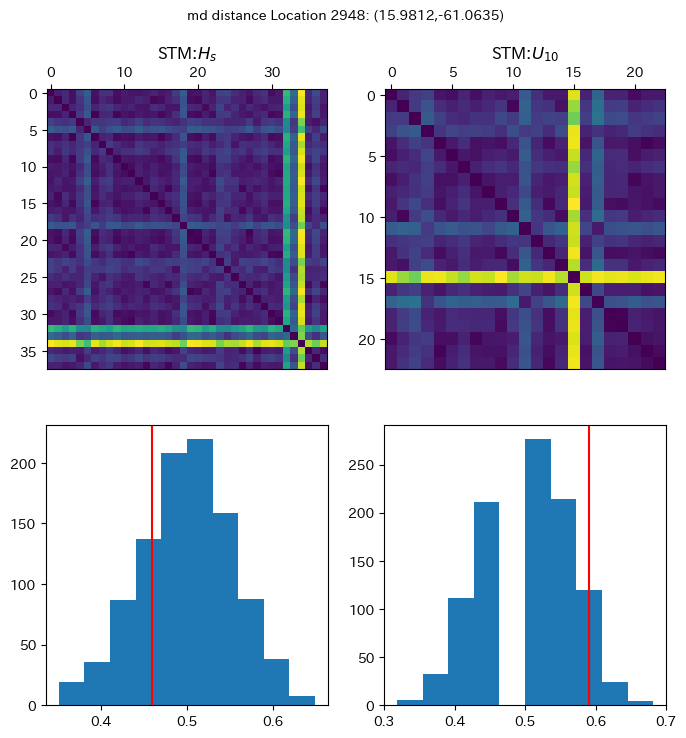

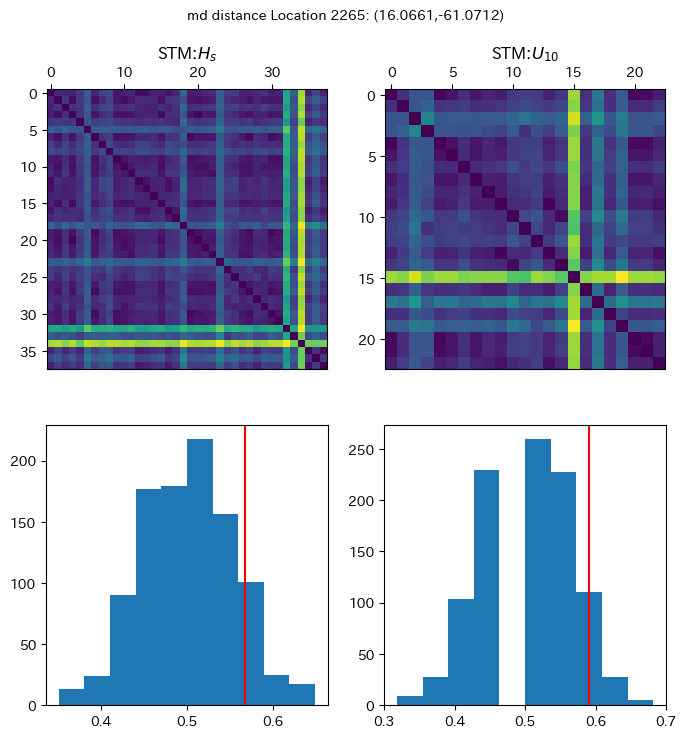

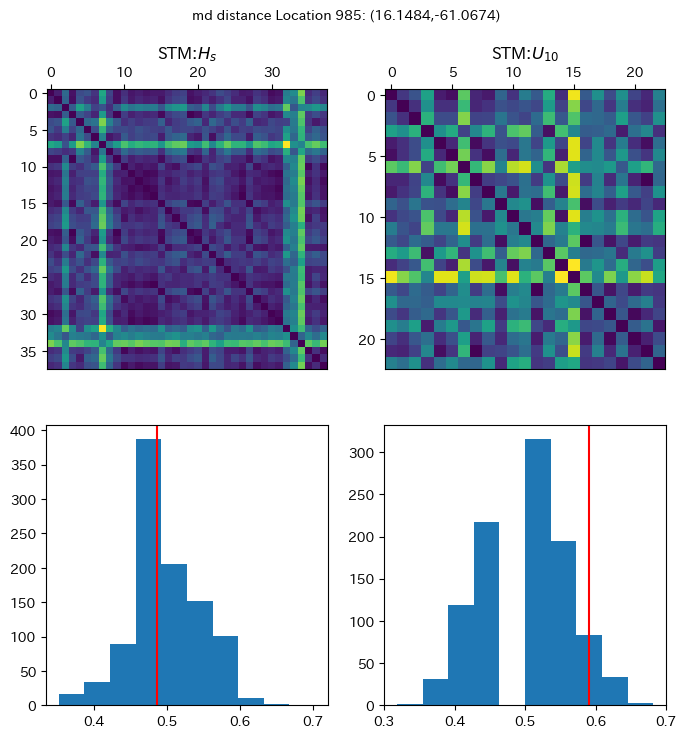

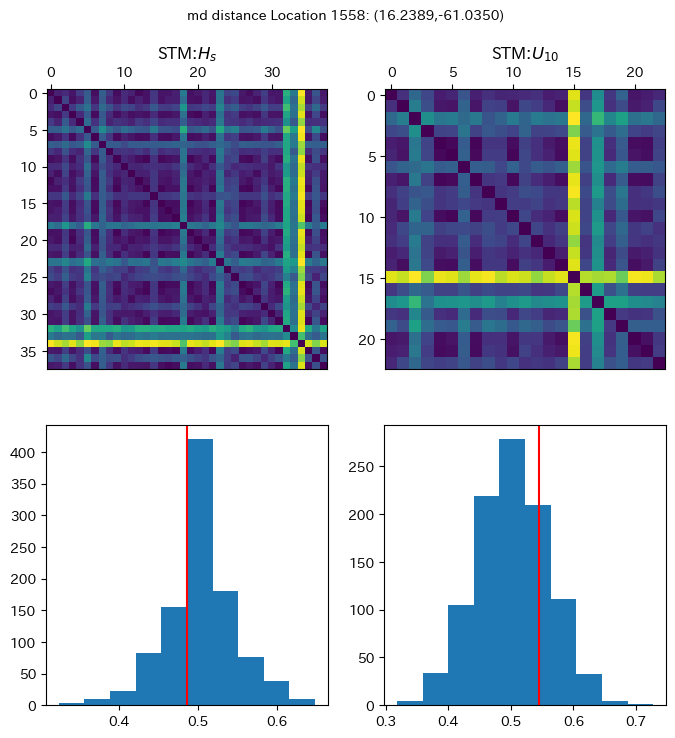

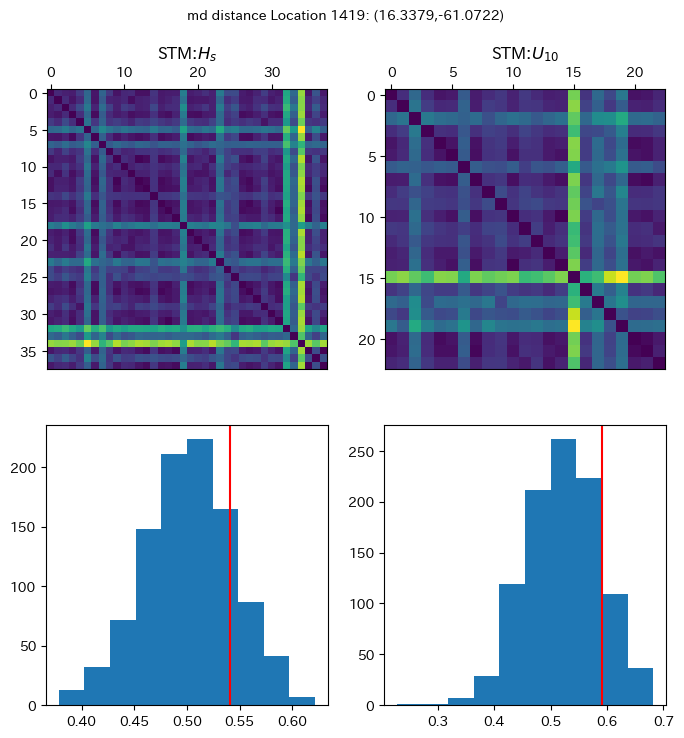

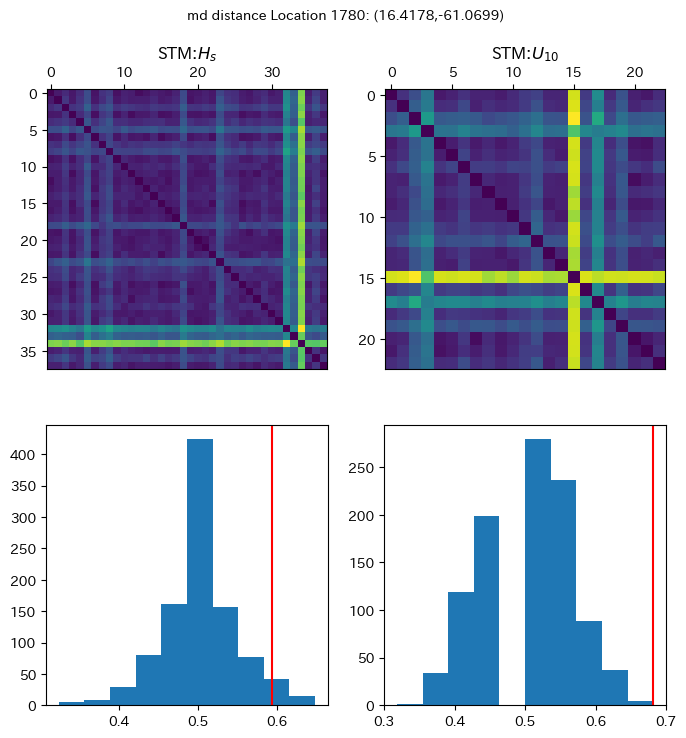

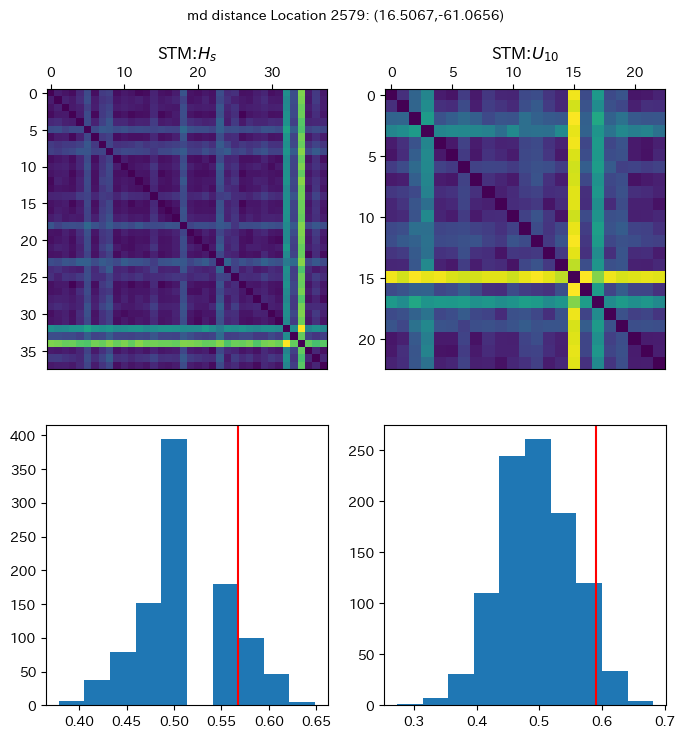

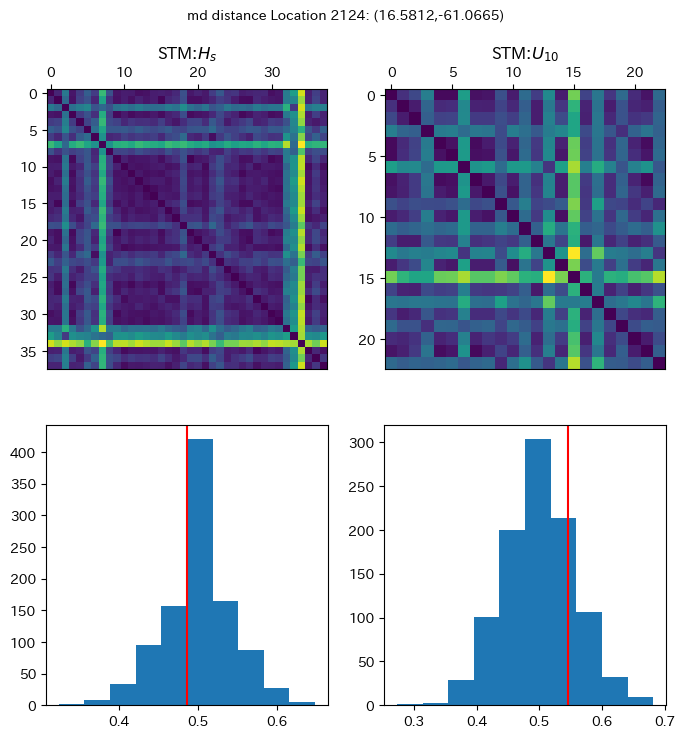

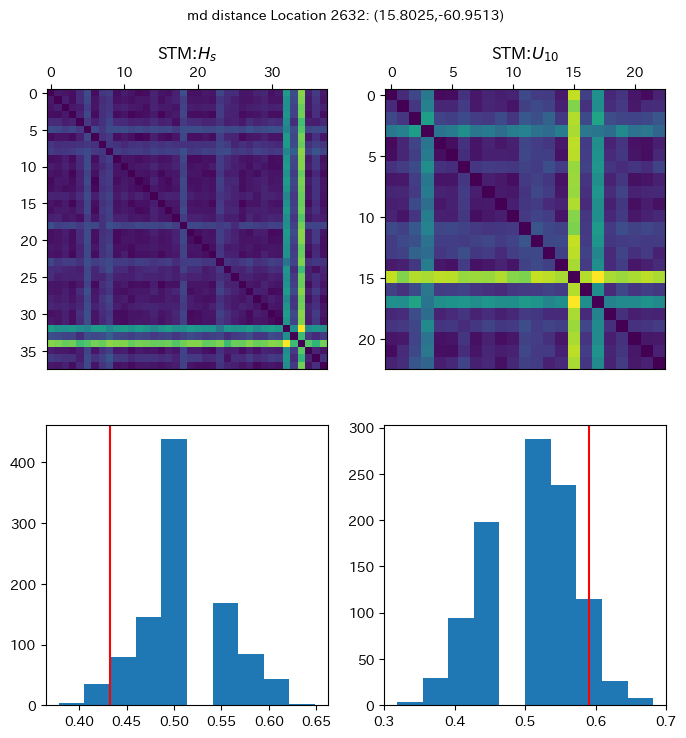

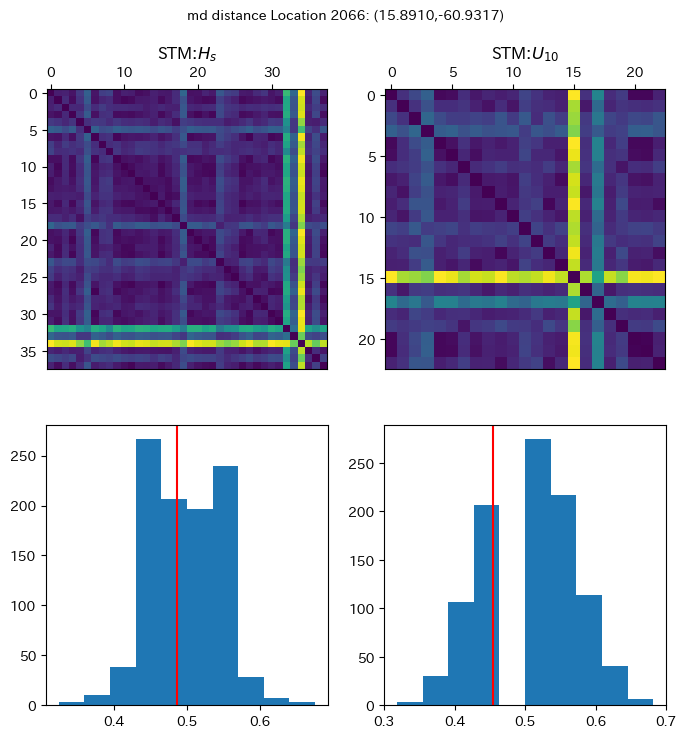

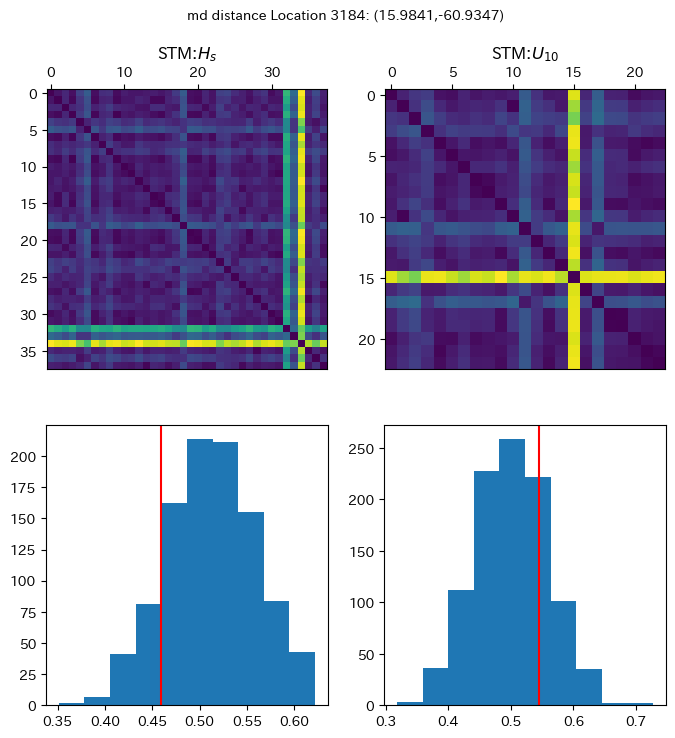

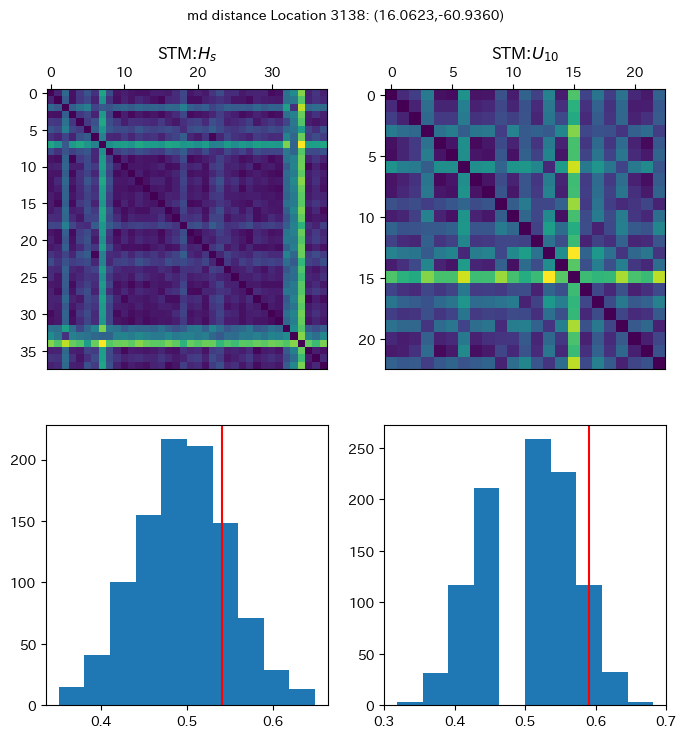

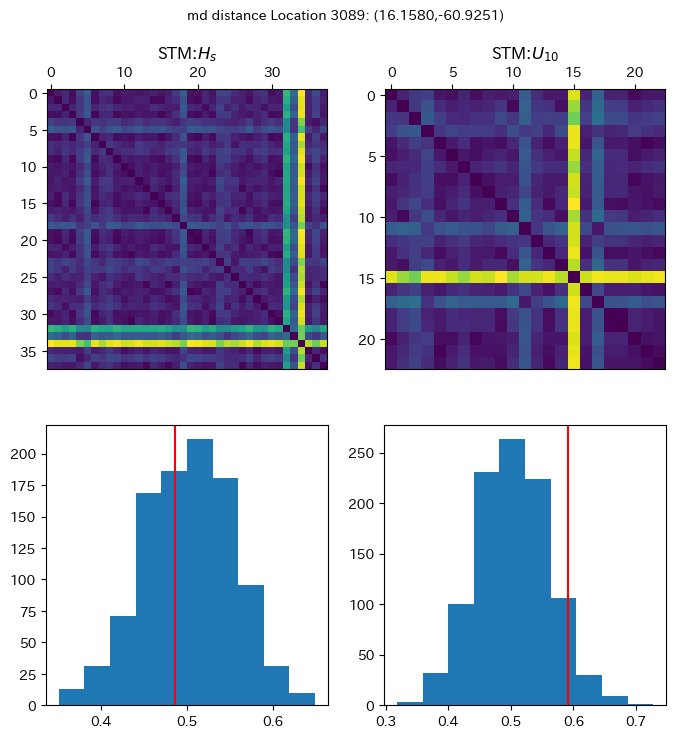

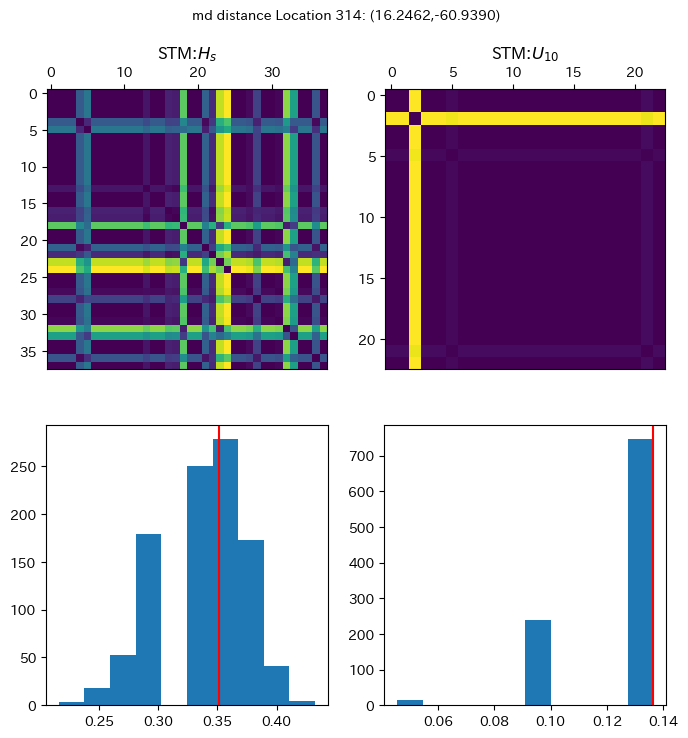

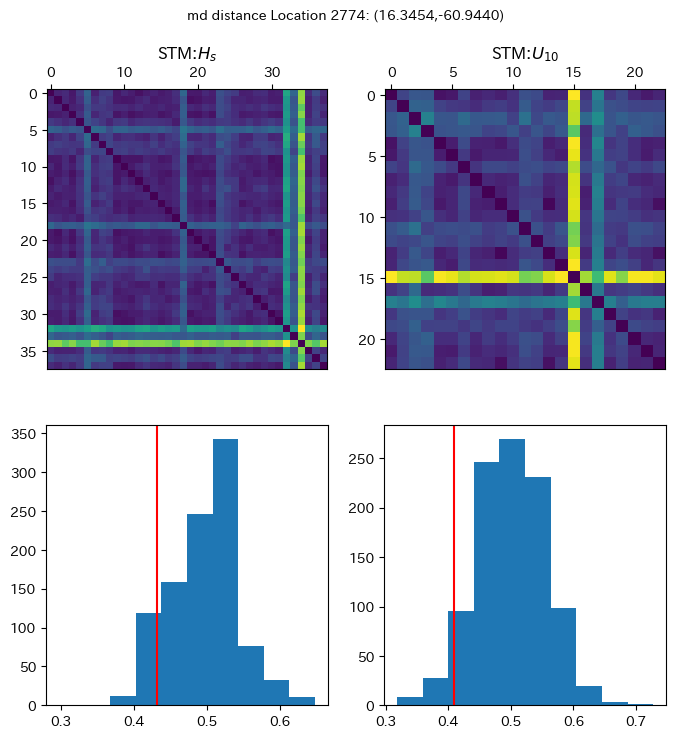

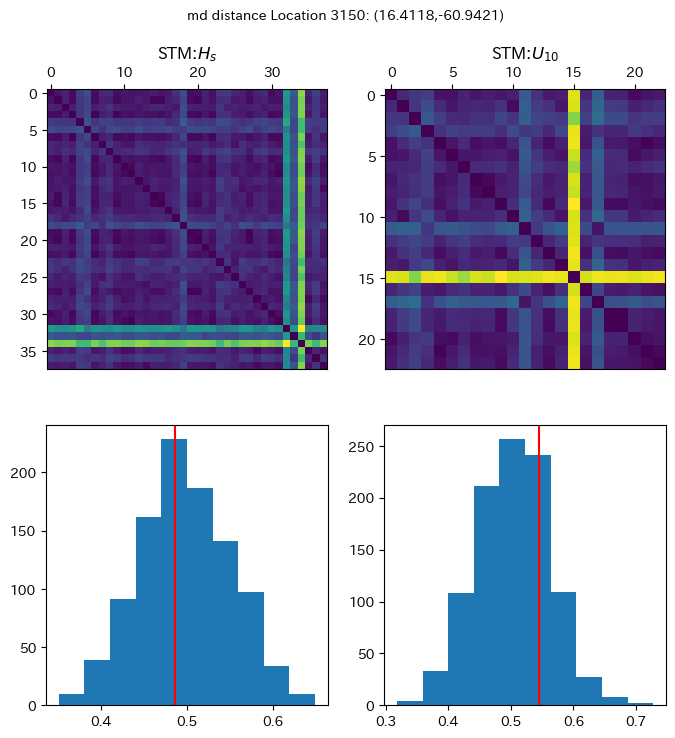

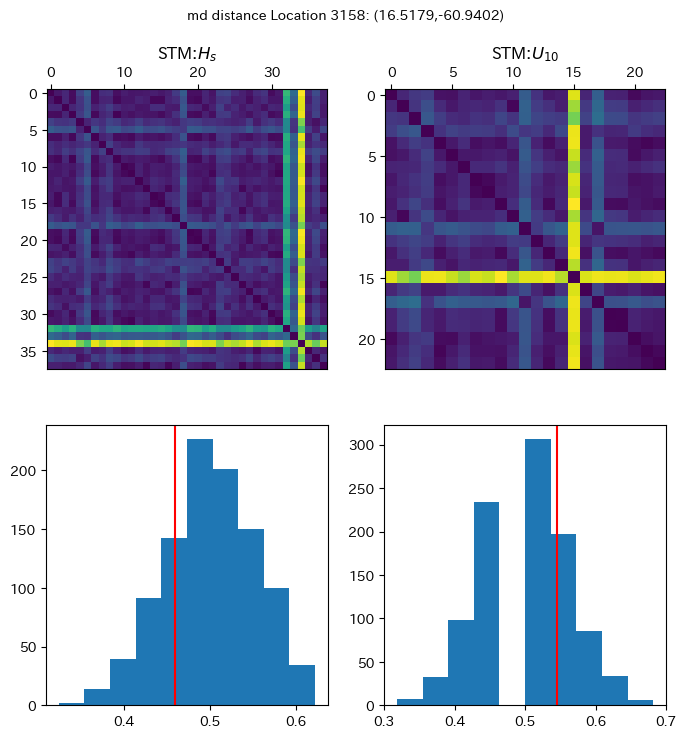

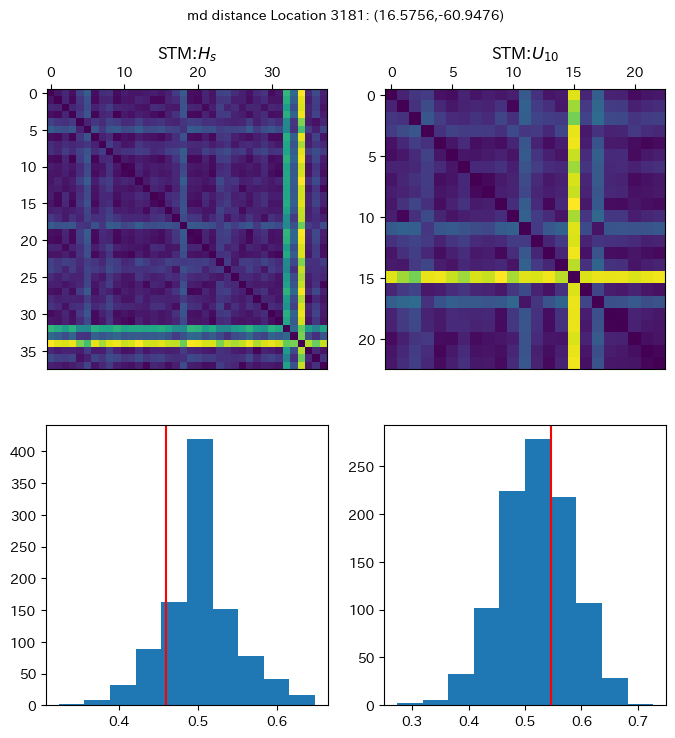

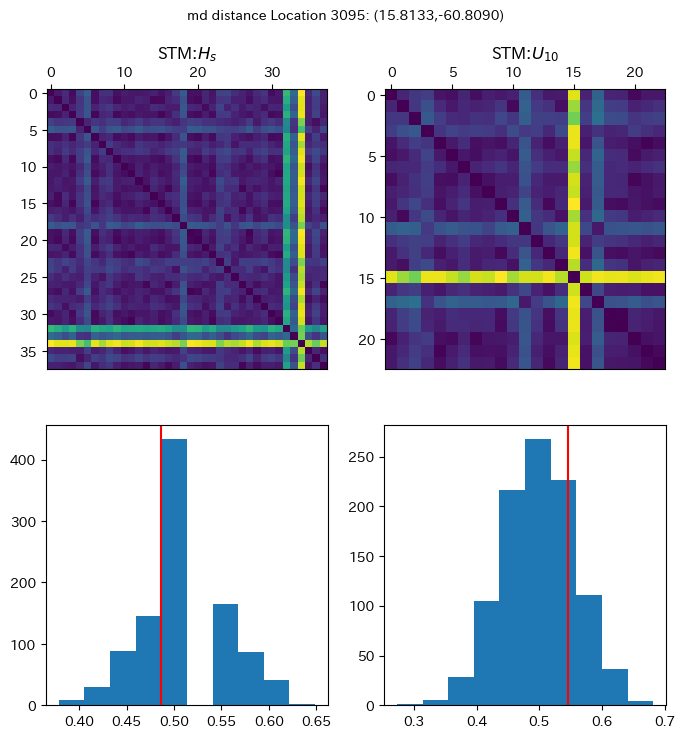

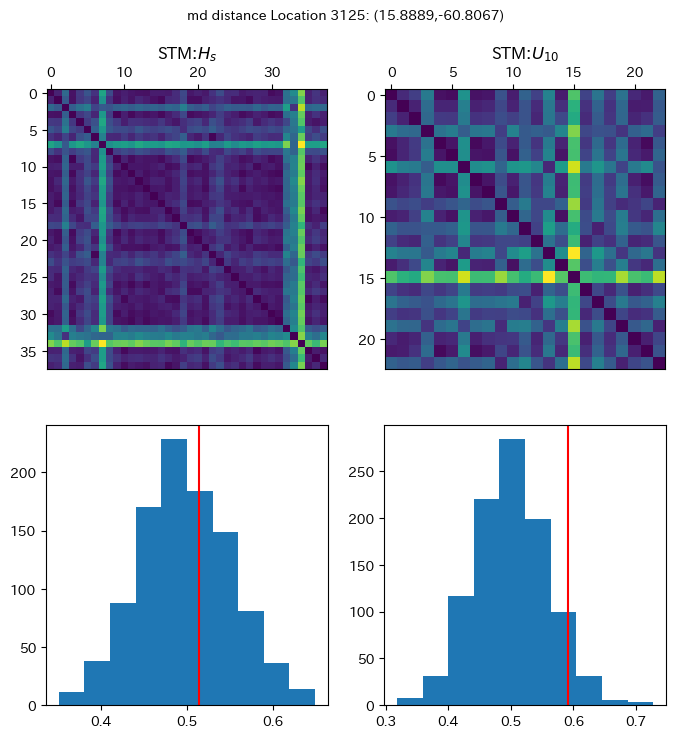

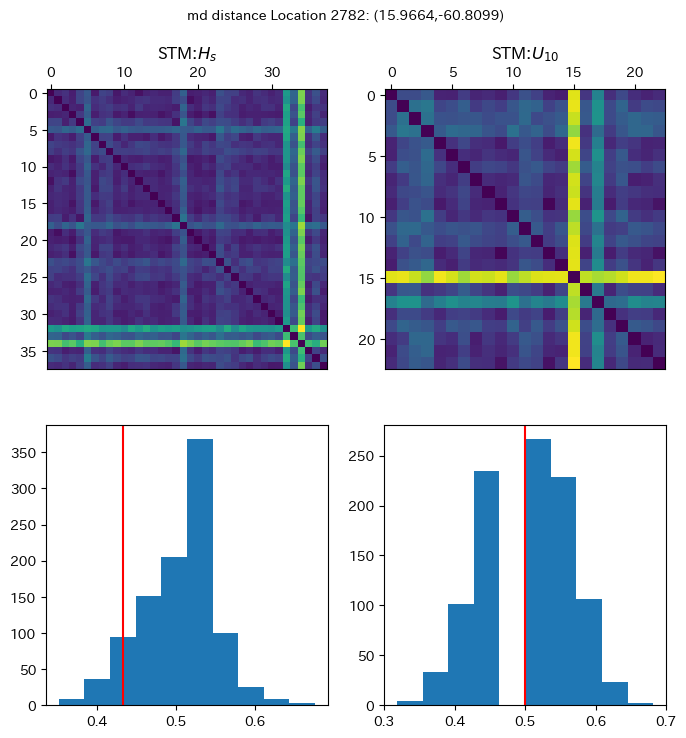

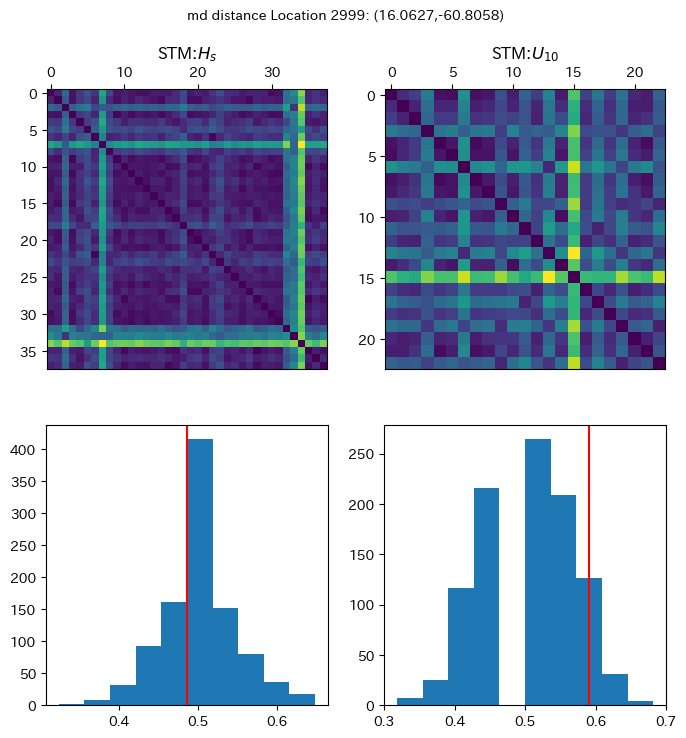

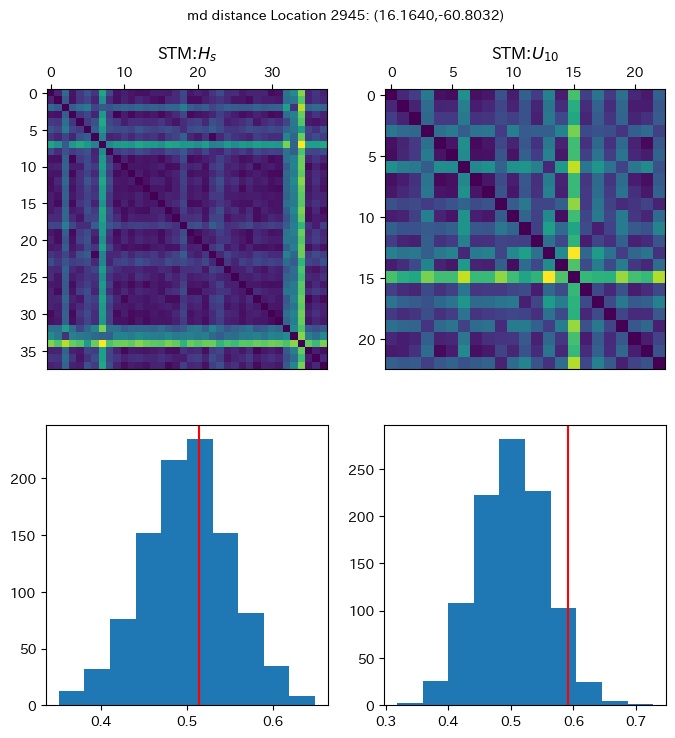

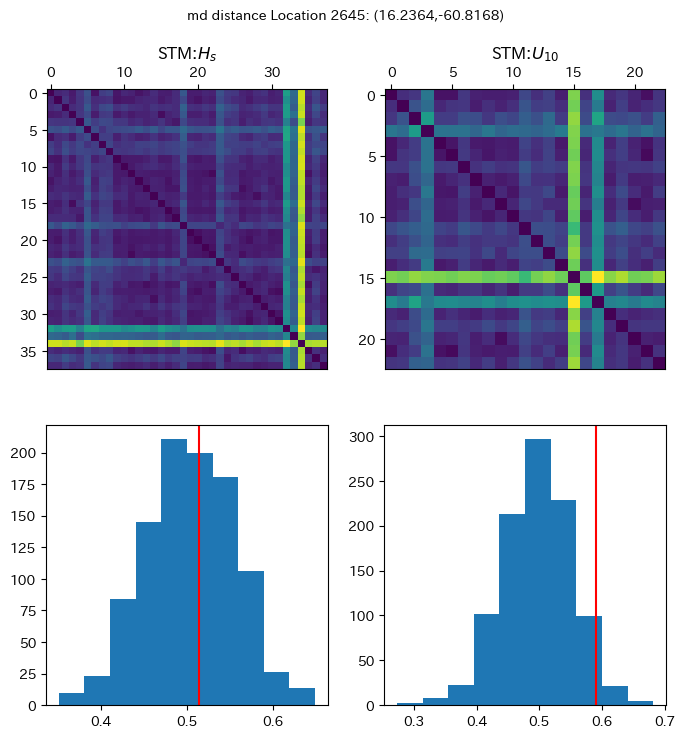

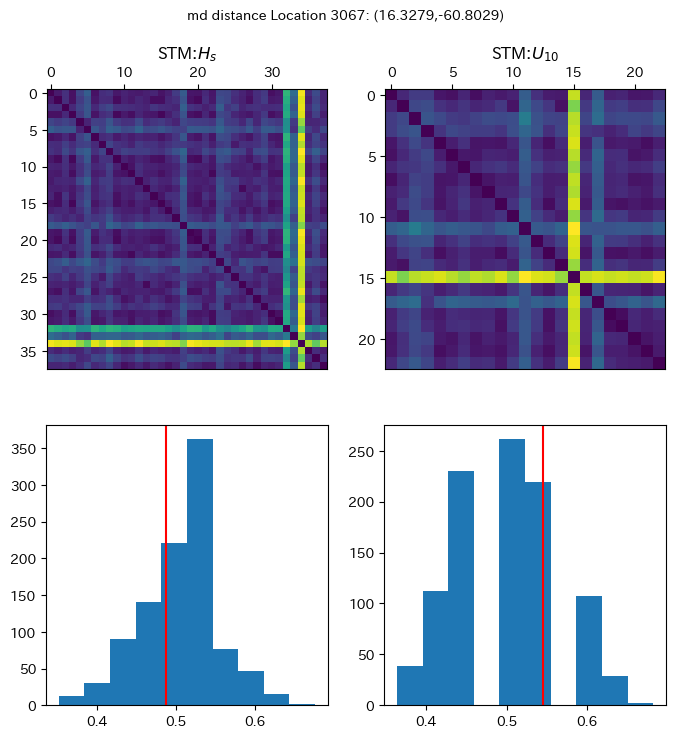

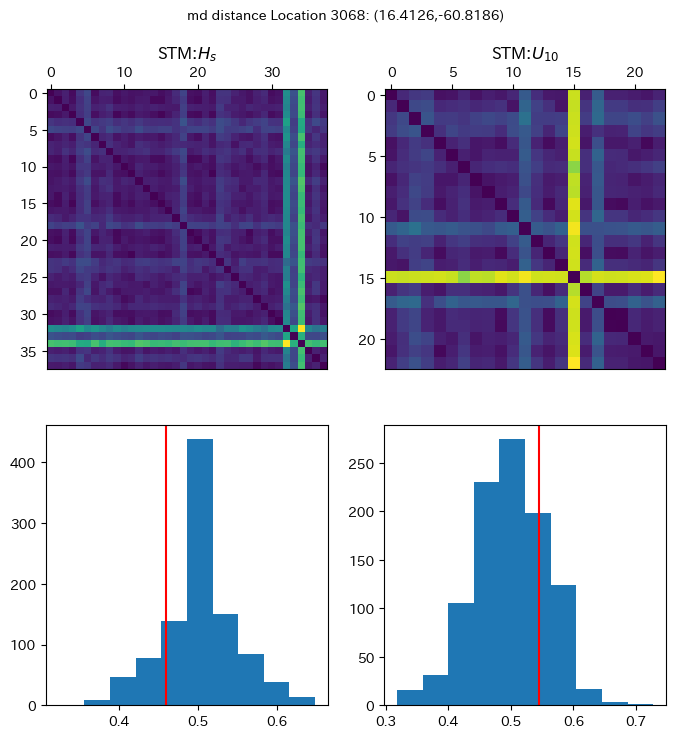

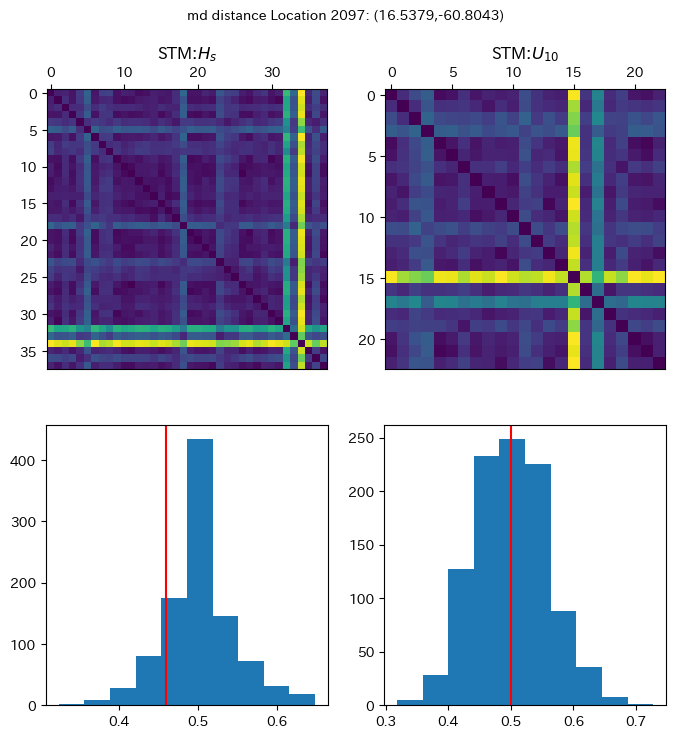

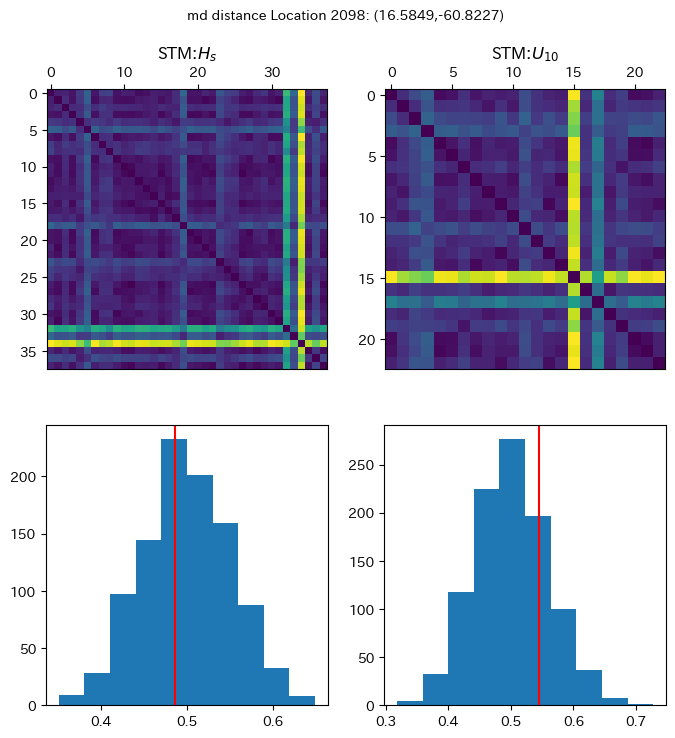

In [16]:
grapher.plot("1")

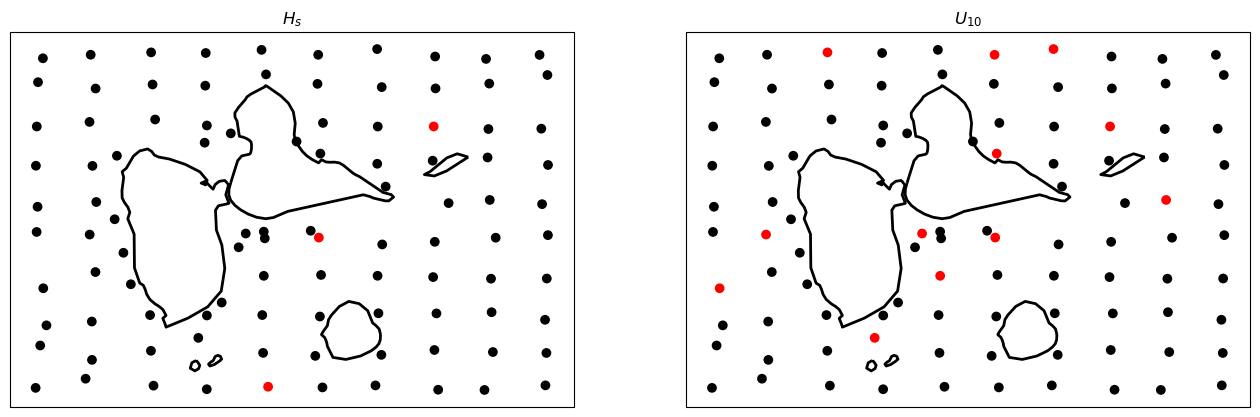

In [21]:
grapher.plot("2")

(array([  3.,  12.,  60., 165., 227., 264., 162.,  80.,  23.,   4.]),
 array([0.38588589, 0.39834835, 0.41081081, 0.42327327, 0.43573574,
        0.4481982 , 0.46066066, 0.47312312, 0.48558559, 0.49804805,
        0.51051051]),
 <BarContainer object of 10 artists>)

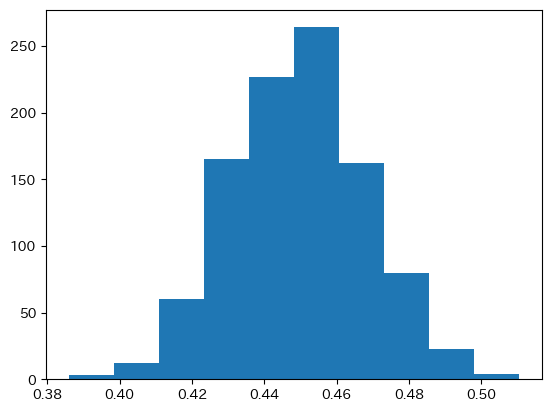

In [44]:
vi=0
i=0

plt.hist(k_dict['k_null'][vi][i])

In [41]:
k_dict['k'][0][1]

0.31981981981981983